In [1]:
# import the required packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import nltk
%matplotlib inline
nltk.download("wordnet")
nltk.download('omw-1.4')
from nltk.stem.snowball import SnowballStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our mode 
from sklearn.utils import resample 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jingx\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jingx\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Problem1

## 1. Text Data Preprocessing

### 1.1 Load the Text Data

In [2]:
dat=pd.read_csv('reddit_5.csv')
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      5000 non-null   object
 1   category  5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [3]:
dat['text'][0]

"This is just an hypothesis on how I imagine an European league, with the relegation of just one team:<lb><lb>**Champions League** is the main league and consists of 20 teams:<lb><lb>(at the time of writing the first 20 teams of UEFA ranking)<lb><lb>* Real Madrid CF<lb>* Club Atlético de Madrid<lb>* FC Barcelona<lb>* FC Bayern München<lb>* Juventus<lb>* Sevilla FC<lb>* Paris Saint-Germain<lb>* Manchester City FC<lb>* Borussia Dortmund<lb>* SL Benfica<lb>* Arsenal FC<lb>* SSC Napoli<lb>* FC Porto<lb>* Chelsea FC<lb>* Manchester United FC<lb>* Bayer 04 Leverkusen<lb>* FC Shakhtar Donetsk<lb>* FC Zenit<lb>* FC Schalke 04<lb>* Tottenham Hotspur FC<lb><lb>At the end of regular season:<lb>Teams placed from 1 to 8 qualify for Play-Off, which will determine the European champion with a Final Game<lb><lb><lb>Teams placed from 13 to 20 will do Play-Out<lb><lb>A final game will determine the team that relegates<lb><lb>Only one team relegates.<lb><lb><lb>Relegated team will go back and play in its

In [4]:
dat['category'].value_counts()


soccer          1000
snowboarding    1000
triathlon       1000
judo            1000
surfing         1000
Name: category, dtype: int64

In [5]:
dat.head()

,text,category
0,This is just an hypothesis on how I imagine an...,soccer
1,"Hey community, I want to get your opinion on w...",snowboarding
2,I have a roubaix road bike with aero bars and ...,triathlon
3,Out of the u17 World Cup winners “top prospect...,soccer
4,A while ago I quit Judo and since then I've da...,judo


### 1.2 Cleanse the Text Data

In [116]:
def pre_process(text):

 # lowercase
     text=text.lower()

 #remove tags
     text=re.sub("</?.*?>"," <> ",text)

 # remove special characters and digits
     text=re.sub("(\\d|\\W|_)+"," ",text)

     return text

dat['text_clean'] = dat['text'].apply(lambda x:pre_process(x))
dat['text_clean']

0       this is just an hypothesis on how i imagine an...
1       hey community i want to get your opinion on wh...
2       i have a roubaix road bike with aero bars and ...
3       out of the u world cup winners top prospects w...
4       a while ago i quit judo and since then i ve da...
                              ...                        
4995    hey do you guys have any recommendations for h...
4996     ft manchester united wigan athletic fellaini ...
4997     sprite p fc barcelona season w d l gd points ...
4998    bluf riding a combo of an longboard and a big ...
4999    hello triathletes i don t have a fitness watch...
Name: text_clean, Length: 5000, dtype: object

In [7]:
#tokenize the text
def tokenize_text(text):
    tokens = re.split('\W+', text)
    return tokens

dat['text_tokenized']= dat['text_clean'].apply(lambda x:tokenize_text(x))

<>:3: DeprecationWarning: invalid escape sequence '\W'
<>:3: DeprecationWarning: invalid escape sequence '\W'
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\557177264.py:3: DeprecationWarning: invalid escape sequence '\W'
  tokens = re.split('\W+', text)


In [117]:
## Removing stopwords
def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(stop_set)

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

stopwords = get_stop_words(r'stopwords.txt')

dat['text_no_stopwords']= dat['text_tokenized'].apply(lambda x:remove_stopwords(x))
dat['text_no_stopwords']

0       [hypothesis, imagine, european, league, relega...
1       [hey, community, opinion, vail, resorts, mount...
2       [roubaix, road, bike, aero, bars, using, preva...
3       [world, cup, winners, top, prospects, players,...
4       [ago, quit, judo, ve, dabbled, lot, martial, a...
                              ...                        
4995    [hey, guys, recommendations, hostels, stay, ne...
4996    [, ft, manchester, united, wigan, athletic, fe...
4997    [, sprite, fc, barcelona, season, gd, dropped,...
4998    [bluf, riding, combo, longboard, boy, shortboa...
4999    [hello, triathletes, don, fitness, watch, don,...
Name: text_no_stopwords, Length: 5000, dtype: object

In [9]:
## Lemmatization
wn = nltk.WordNetLemmatizer()
def lemmatize_text(text):
    text = [wn.lemmatize(word) for word in text]
    return text

dat['text_lemmatized']= dat['text_no_stopwords'].apply(lambda x:lemmatize_text(x))
## Joining back all the words(lemmatized)
def joiner(text):
    text = " ".join(text)
    return text
dat['text_final']= dat['text_lemmatized'].apply(lambda x:joiner(x))


In [10]:
text_final=dat['text_final']
text_final[0]

'hypothesis imagine european league relegation team champion league main league consists team time writing team uefa ranking real madrid cf club atlético de madrid fc barcelona fc bayern münchen juventus sevilla fc paris saint germain manchester city fc borussia dortmund sl benfica arsenal fc ssc napoli fc porto chelsea fc manchester united fc bayer leverkusen fc shakhtar donetsk fc zenit fc schalke tottenham hotspur fc regular season team placed qualify play determine european champion final game team placed play final game determine team relegates team relegates relegated team play national league premier serie etc uefa league tier consists team win national league sort champion cup winner uefa league play season champion league team champion league play national league national cup add downvotes negative comment concept team super league repeatedly menace closed usa '

In [11]:
dat.head()

,text,category,text_clean,text_tokenized,text_no_stopwords,text_lemmatized,text_final
0,This is just an hypothesis on how I imagine an...,soccer,this is just an hypothesis on how i imagine an...,"[this, is, just, an, hypothesis, on, how, i, i...","[hypothesis, imagine, european, league, relega...","[hypothesis, imagine, european, league, relega...",hypothesis imagine european league relegation ...
1,"Hey community, I want to get your opinion on w...",snowboarding,hey community i want to get your opinion on wh...,"[hey, community, i, want, to, get, your, opini...","[hey, community, opinion, vail, resorts, mount...","[hey, community, opinion, vail, resort, mounta...",hey community opinion vail resort mountain pas...
2,I have a roubaix road bike with aero bars and ...,triathlon,i have a roubaix road bike with aero bars and ...,"[i, have, a, roubaix, road, bike, with, aero, ...","[roubaix, road, bike, aero, bars, using, preva...","[roubaix, road, bike, aero, bar, using, prevai...",roubaix road bike aero bar using prevail bit o...
3,Out of the u17 World Cup winners “top prospect...,soccer,out of the u world cup winners top prospects w...,"[out, of, the, u, world, cup, winners, top, pr...","[world, cup, winners, top, prospects, players,...","[world, cup, winner, top, prospect, player, ca...",world cup winner top prospect player career fa...
4,A while ago I quit Judo and since then I've da...,judo,a while ago i quit judo and since then i ve da...,"[a, while, ago, i, quit, judo, and, since, the...","[ago, quit, judo, ve, dabbled, lot, martial, a...","[ago, quit, judo, ve, dabbled, lot, martial, a...",ago quit judo ve dabbled lot martial art recen...


### 1.3 Bag-of-Word

In [12]:
#create a vocabulary of words,
#ignore words that appear in 15% of documents,
#eliminate stop words
count_vect = CountVectorizer(max_df=0.15,stop_words=stopwords, max_features=5000)
text_counts = count_vect.fit_transform(text_final.tolist())
count_vect.stop_words_


{'anelka',
 'madagascar',
 'shameful',
 'anyday',
 'keta',
 'levski',
 'architecture',
 'aanpxet',
 'oboabona',
 'peetu',
 'tus',
 'honeycomb',
 'gerlitzen',
 'samorin',
 'sciatica',
 'grosicki',
 'tachiwaza',
 'technologically',
 'roord',
 'scrummage',
 'signigs',
 'philly',
 'kxshal',
 'gake',
 'tohkon',
 'declaration',
 'clickid',
 'crystalpalace',
 'backyard',
 'kingdom',
 'honesty',
 'finterior',
 'exertion',
 'ajc',
 'redmond',
 'afeel',
 'prohibitive',
 'spectrum',
 'mcmanaman',
 'provider',
 'kjw',
 'silky',
 'whore',
 'querétaro',
 'hypothesis',
 'luismechegaray',
 'ouro',
 'tapia',
 'anagram',
 'seria',
 'dosed',
 'chemnitzer',
 'cried',
 'noriega',
 'cesc',
 'anji',
 'respiratory',
 'princess',
 'tatsuya',
 'idan',
 'ache',
 'jacksonville',
 'sidehill',
 'eats',
 'criminal',
 'ballin',
 'broeker',
 'sepia',
 'vhs',
 'arriving',
 'redline',
 'setúbal',
 'nea',
 'handrail',
 'hushed',
 'justin',
 'eligibility',
 'bicicletas',
 'rvideos',
 'mediapro',
 'awukm',
 'rugani',
 'thi

In [13]:
text_counts.shape

(5000, 5000)

In [14]:
sum_words = text_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print('The highest frequency words:')
words_freq[0:20] 

The highest frequency words:


[('board', 1642),
 ('sprite', 1576),
 ('judo', 1533),
 ('team', 1362),
 ('icon', 1316),
 ('bike', 1278),
 ('goal', 1273),
 ('training', 1212),
 ('season', 1100),
 ('www', 1086),
 ('league', 957),
 ('people', 941),
 ('player', 887),
 ('run', 851),
 ('game', 828),
 ('club', 824),
 ('lot', 807),
 ('doing', 798),
 ('feel', 762),
 ('surf', 725)]

In [15]:
print('The lowest frequency words:')
words_freq[-20:] 

The lowest frequency words:


[('lamela', 7),
 ('argon', 7),
 ('victim', 7),
 ('nainggolan', 7),
 ('sturaro', 7),
 ('stephan', 7),
 ('outstanding', 7),
 ('primeira', 7),
 ('uganda', 7),
 ('chamois', 7),
 ('pennsylvania', 7),
 ('osotogari', 7),
 ('dennis', 7),
 ('prowse', 7),
 ('moon', 7),
 ('ashley', 7),
 ('nominated', 7),
 ('chicharito', 7),
 ('donaldson', 7),
 ('casciaro', 7)]

In [16]:
#returns list of all the words in the vocabulary
count_vect.get_feature_names_out()


array(['aaron', 'ability', 'able', ..., 'ádám', 'álvaro', 'ángel'],
      dtype=object)

In [17]:
#show how many words are there in the vocabulary
feature_names=np.array(count_vect.get_feature_names_out())
len(count_vect.get_feature_names_out())

5000

In [18]:
pd.DataFrame(text_counts.toarray())


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
pd.DataFrame(text_tfidf.toarray()).to_csv("Jingxiang_TFIDF.csv",index=False)

In [147]:
pd.DataFrame(text_counts.toarray()).to_csv("Jingxiang_WordCount.csv",index=False)

### 1.4 TF-IDF

In [19]:
# Generate TF-IDF Matrix
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
text_tfidf = tfidf_transformer.fit_transform(text_counts)
#fit the model to the bag-of-words representation of text data

In [20]:
tfidf_transformer.idf_

array([7.32016859, 5.28328667, 3.44896758, ..., 8.41878088, 7.7256337 ,
       7.57148302])

In [21]:
#store indices of words with lowest IDF values in descending order
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
print("Features with lowest idf:\n{}".format(
 feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['board' 'training' 'people' 'judo' 'lot' 'doing' 'season' 'pretty'
 'getting' 'feel' 'www' 'help' 'month' 'll' 'look' 'hey' 'team' 'question'
 'run' 'bike' 'experience' 'bit' 'start' 'little' 'trying' 'advice' 'goal'
 'ride' 'surf' 'surfing' 're' 'wondering' 'able' 'club' 'love' 'try'
 'game' 'edit' 'started' 'thinking' 'player' 'hi' 'maybe' 'top' 'wave'
 'probably' 'league' 'trip' 'etc' 'match' 'post' 'friend' 'race' 'throw'
 'hour' 'sport' 'half' 'ago' 'didn' 'water' 'couple' 'live' 'hard'
 'currently' 'recently' 'riding' 'idea' 'tip' 'swim' 'found' 'triathlon'
 'won' 'past' 'watch' 'fun' 'else' 'leg' 'mountain' 'level' 'snowboarding'
 'break' 'th' 'tri' 'doesn' 'city' 'running' 'local' 'appreciated'
 'football' 'plan' 'belt' 'foot' 'real' 'train' 'minute' 'spot' 'world'
 'coming' 'suggestion' 'play']


In [22]:
pd.DataFrame(text_tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.204571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146585
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4996,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4997,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4998,0.0,0.000000,0.069337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [23]:
# find maximum value for each of the features over dataset:
max_value = text_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
#print words with lowest IDF
print("Features with lowest tfidf:\n{}".format(
 feature_names[sorted_by_tfidf[:20]]))

Features with lowest tfidf:
['rebound' 'gameid' 'zaza' 'sané' 'ht' 'sokratis' 'ashley' 'mina'
 'shakhtar' 'livesoccertv' 'lichtsteiner' 'rakitic' 'eduardo' 'mohamed'
 'romelu' 'kickoff' 'donetsk' 'etihad' 'ingolstadt' 'klavan']


In [24]:
print("Features with highest tfidf: \n{}".format(
 feature_names[sorted_by_tfidf[-20:]]))

Features with highest tfidf: 
['shark' 'prediction' 'sumo' 'pt' 'tottenham' 'kata' 'profit' 'gt' 'forum'
 'amp' 'commute' 'fcb' 'position' 'vote' 'bag' 'mitt' 'icon' 'streamable'
 'iceland' 'sprite']


## 2. Text Data Understanding

### 2.1 Extract keywords using TF-IDF matrix

In [25]:
idx=0
doc = text_final[idx]
print(doc)
tf_idf_vector=text_tfidf[idx]
print(tf_idf_vector)

hypothesis imagine european league relegation team champion league main league consists team time writing team uefa ranking real madrid cf club atlético de madrid fc barcelona fc bayern münchen juventus sevilla fc paris saint germain manchester city fc borussia dortmund sl benfica arsenal fc ssc napoli fc porto chelsea fc manchester united fc bayer leverkusen fc shakhtar donetsk fc zenit fc schalke tottenham hotspur fc regular season team placed qualify play determine european champion final game team placed play final game determine team relegates team relegates relegated team play national league premier serie etc uefa league tier consists team win national league sort champion cup winner uefa league play season champion league team champion league play national league national cup add downvotes negative comment concept team super league repeatedly menace closed usa 
  (0, 4989)	0.06591316579852535
  (0, 4943)	0.06195078422058308
  (0, 4897)	0.04914320101161455
  (0, 4891)	0.03940828

In [26]:
temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
temp.sort_values('tf_idf', ascending = False, inplace = True)
temp

,feature_number,tf_idf
46,1530,0.559663
39,2441,0.389460
9,4389,0.349999
61,715,0.220210
28,3224,0.194474
...,...,...
3,4891,0.039408
23,3480,0.038444
59,775,0.038154
48,1421,0.035487


In [27]:
#use only topn items from vector
topn =5
topn_items = temp[:topn]
tf_idf = []
word = []
for index, row in topn_items.iterrows():
     fname = feature_names[int(row['feature_number'])]
     word.append(fname)
     tf_idf.append(round(row['tf_idf'], 3)) 
print(doc, '\n')
result = dict(zip(word, tf_idf))
print(result)

hypothesis imagine european league relegation team champion league main league consists team time writing team uefa ranking real madrid cf club atlético de madrid fc barcelona fc bayern münchen juventus sevilla fc paris saint germain manchester city fc borussia dortmund sl benfica arsenal fc ssc napoli fc porto chelsea fc manchester united fc bayer leverkusen fc shakhtar donetsk fc zenit fc schalke tottenham hotspur fc regular season team placed qualify play determine european champion final game team placed play final game determine team relegates team relegates relegated team play national league premier serie etc uefa league tier consists team win national league sort champion cup winner uefa league play season champion league team champion league play national league national cup add downvotes negative comment concept team super league repeatedly menace closed usa  

{'fc': 0.56, 'league': 0.389, 'team': 0.35, 'champion': 0.22, 'play': 0.194}


In [28]:
#extract keywords for all text
#taking top5 keywords based on TF-IDF score
topn = 5
results =[]
word_list=[]

In [29]:
for idx, doc in text_final.items():
    
    #generate tf-idf for the given document
    tf_idf_vector=text_tfidf[idx]

    temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
    temp.sort_values('tf_idf', ascending = False, inplace = True)
    #use only topn items from vector
    topn_items=temp[:topn]
    tf_idf = []
    word = []
    
    for index, row in topn_items.iterrows():
        
        fname = feature_names[int(row['feature_number'])]
        word.append(fname)
        tf_idf.append(round(row['tf_idf'], 3))
    result = dict(zip(word, tf_idf))
    word_list.append(word)
    results.append(result)


In [30]:
#dat['cleansed_text'] = text_final
dat['keywords'] = results


In [31]:
keywords_only=[]
for dict in results:
    list_keys = dict.keys()
    res = " ".join(list_keys)
    keywords_only.append(res)

dat['formatted_keywords'] = keywords_only
dat.head()


,text,category,text_clean,text_tokenized,text_no_stopwords,text_lemmatized,text_final,keywords,formatted_keywords
0,This is just an hypothesis on how I imagine an...,soccer,this is just an hypothesis on how i imagine an...,"[this, is, just, an, hypothesis, on, how, i, i...","[hypothesis, imagine, european, league, relega...","[hypothesis, imagine, european, league, relega...",hypothesis imagine european league relegation ...,"{'fc': 0.56, 'league': 0.389, 'team': 0.35, 'c...",fc league team champion play
1,"Hey community, I want to get your opinion on w...",snowboarding,hey community i want to get your opinion on wh...,"[hey, community, i, want, to, get, your, opini...","[hey, community, opinion, vail, resorts, mount...","[hey, community, opinion, vail, resort, mounta...",hey community opinion vail resort mountain pas...,"{'vail': 0.487, 'beaver': 0.28, 'creek': 0.255...",vail beaver creek keystone utah
2,I have a roubaix road bike with aero bars and ...,triathlon,i have a roubaix road bike with aero bars and ...,"[i, have, a, roubaix, road, bike, with, aero, ...","[roubaix, road, bike, aero, bars, using, preva...","[roubaix, road, bike, aero, bar, using, prevai...",roubaix road bike aero bar using prevail bit o...,"{'helmet': 0.342, 'decide': 0.326, 'aero': 0.3...",helmet decide aero opportunity pro
3,Out of the u17 World Cup winners “top prospect...,soccer,out of the u world cup winners top prospects w...,"[out, of, the, u, world, cup, winners, top, pr...","[world, cup, winners, top, prospects, players,...","[world, cup, winner, top, prospect, player, ca...",world cup winner top prospect player career fa...,"{'career': 0.322, 'nelson': 0.288, 'ability': ...",career nelson ability winner pace
4,A while ago I quit Judo and since then I've da...,judo,a while ago i quit judo and since then i ve da...,"[a, while, ago, i, quit, judo, and, since, the...","[ago, quit, judo, ve, dabbled, lot, martial, a...","[ago, quit, judo, ve, dabbled, lot, martial, a...",ago quit judo ve dabbled lot martial art recen...,"{'judo': 0.439, 'hop': 0.256, 'lastly': 0.241,...",judo hop lastly submission legal


In [32]:
print(keywords_only)

['fc league team champion play', 'vail beaver creek keystone utah', 'helmet decide aero opportunity pro', 'career nelson ability winner pace', 'judo hop lastly submission legal', 'uni look mma join club', 'bruised woke sparring caused btw', 'northstar kirkwood heavenly epic terrain', 'shaper relationship awhile cruz arena', 'country defender aren marko polish', 'water half bumped accidentally comfort', 'duck grip lapel osoto gari', 'lesson channel share youtube besides', 'bar sprite green grey fc', 'heli cliff bowl ice expert', 'blue hyped rush square diamond', 'teenager western midwest nightlife originally', 'flip land throw trampoline landing', 'groundwork accepted sliding doesnt ne', 'bjj plan studying waste judo', 'gi judo resource unfortunately bjj', 'essential billabong suit seam stack', 'hybrid deciding towards ww hypto', 'idea responsibility sf vancouver technology', 'trek variation frame version info', 'belt promote bjj judo rank', 'fin fastest generate deciding dimension', 'm

### 2.2 Association Rules Mining on keywords

In [33]:

dat = dat.join(dat['formatted_keywords'].str.split(" ", expand=True))
full_list=pd.Series([])
keywords_df=dat.iloc[:,8:]
for col in keywords_df:
    full_list=full_list.append(keywords_df[col].dropna())
print(full_list)



0             fc league team champion play
1          vail beaver creek keystone utah
2       helmet decide aero opportunity pro
3        career nelson ability winner pace
4         judo hop lastly submission legal
                       ...                
4995                                 value
4996                              athletic
4997                                    fc
4998                               average
4999                            discipline
Length: 30000, dtype: object


C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\468500860.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full_list=pd.Series([])
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\468500860.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_list=full_list.append(keywords_df[col].dropna())
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\468500860.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_list=full_list.append(keywords_df[col].dropna())
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\468500860.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_list=full_list.append(keywor

In [34]:
print(full_list.value_counts())

board                                203
judo                                 185
bike                                 175
wave                                 101
race                                  99
                                    ... 
listen lewis animal album pumped       1
program schedule start plan past       1
mile pace transition bike run          1
thigh hadaka belt juji understood      1
formatting                             1
Length: 9665, dtype: int64


C:\Users\jingx\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


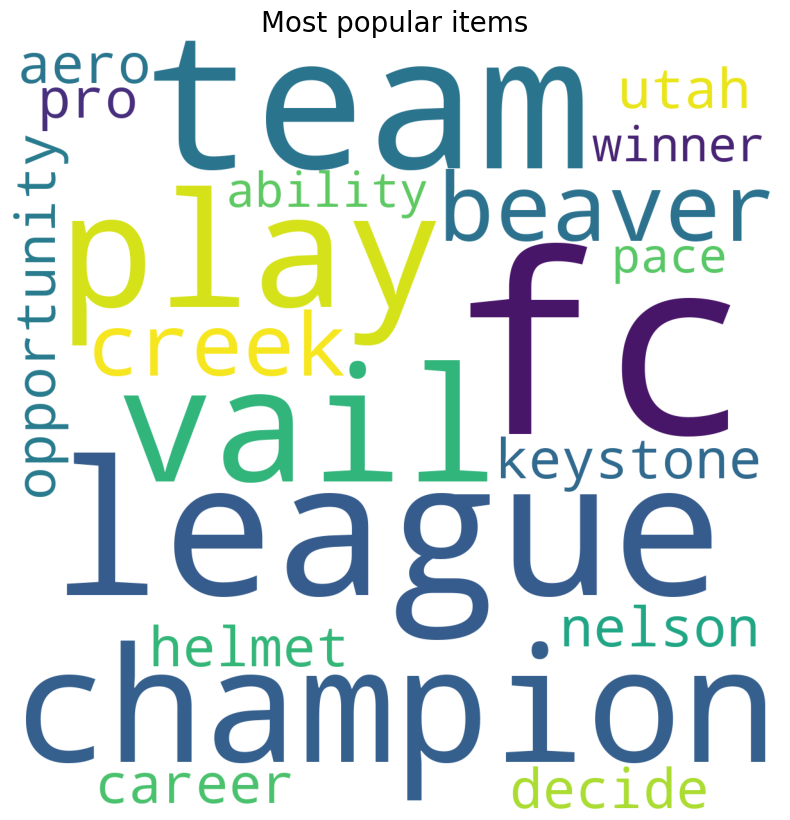

In [35]:
#use wordcloud to print most common keywords
plt.rcParams['figure.figsize']=(10,10)
wordcloud=WordCloud(background_color='white',width= 1200, height =1200, max_words=20).generate(str(full_list))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most popular items',fontsize=20)
plt.show()

In [36]:
full_list.value_counts()

board                                203
judo                                 185
bike                                 175
wave                                 101
race                                  99
                                    ... 
listen lewis animal album pumped       1
program schedule start plan past       1
mile pace transition bike run          1
thigh hadaka belt juji understood      1
formatting                             1
Length: 9665, dtype: int64

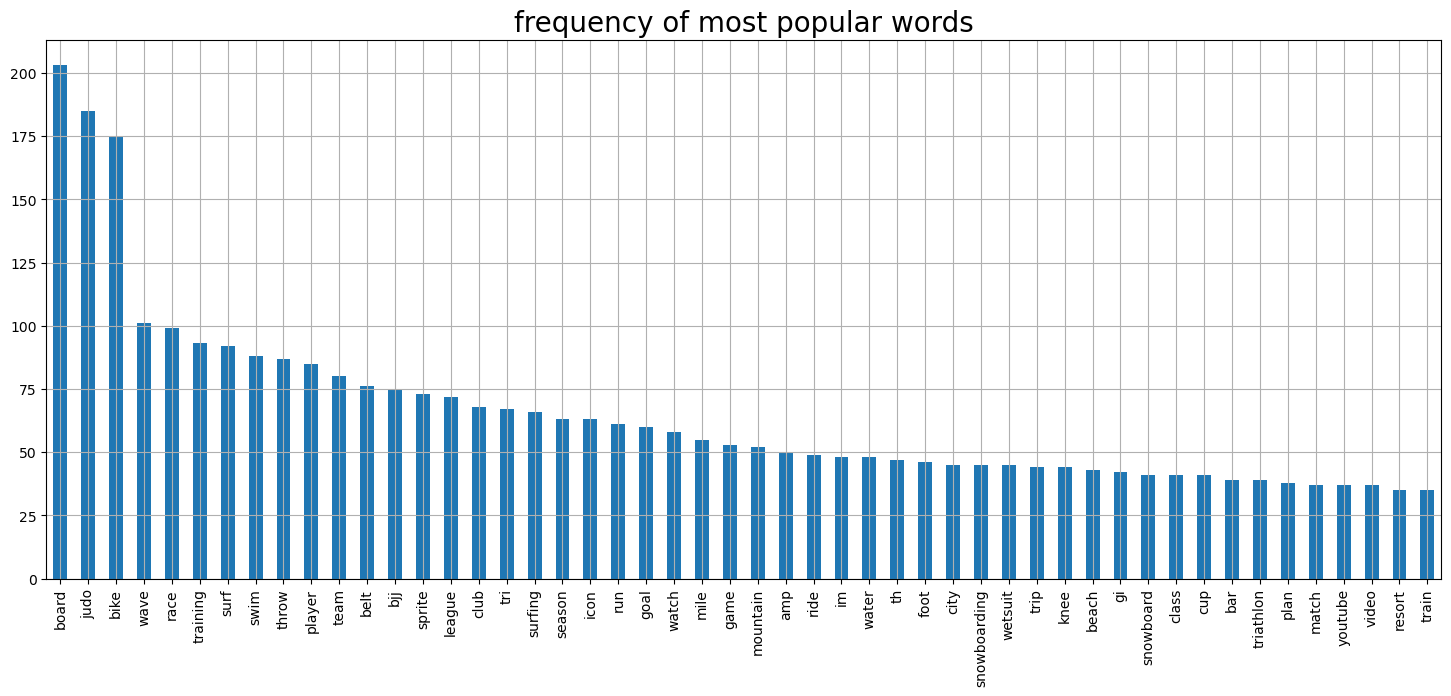

In [37]:
plt.figure(figsize=(18,7))
full_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular words',fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [38]:
y=full_list.value_counts().head(5000).to_frame()
y.index

Index(['board', 'judo', 'bike', 'wave', 'race', 'training', 'surf', 'swim',
       'throw', 'player',
       ...
       'husband floor costco paddled ate',
       'idea drone minded express individual', 'length mid egg vacation board',
       'career potential donnarumma respective player',
       'goalkeeper position keeper refer baseball',
       'finger cut hiatus extended tape', 'cape windy rain expecting wind',
       'stringer board bottom repaired ci', 'goalkeeper wale game news hero',
       'quality humble venture premium attempting'],
      dtype='object', length=5000)

# Preprocess the text

In [39]:
trans=[]
for i in range(0,5000):
    trans.append([str(keywords_df.values[i,j]) for j in range(0,5)])
#convert it to numpy array
trans=np.array(trans)
#checking the shape of the array
print(trans.shape)

(5000, 5)


In [40]:
print(trans)

[['fc league team champion play' 'fc' 'league' 'team' 'champion']
 ['vail beaver creek keystone utah' 'vail' 'beaver' 'creek' 'keystone']
 ['helmet decide aero opportunity pro' 'helmet' 'decide' 'aero'
  'opportunity']
 ...
 ['cf dropped gd sprite fc' 'cf' 'dropped' 'gd' 'sprite']
 ['ci forgiving joe shortboard average' 'ci' 'forgiving' 'joe'
  'shortboard']
 ['computer track watch bike discipline' 'computer' 'track' 'watch'
  'bike']]


In [41]:
#transform the input dataset( a python lists) into a one hot encoded numpy boolean array
te=TransactionEncoder()
data_encoded=te.fit_transform(trans)
data_encoded=pd.DataFrame(data_encoded,columns=te.columns_)

#data_encoded=data_encoded.iloc[0:5000,0:50]

#checking the shape
data_encoded.shape


(5000, 9447)

In [42]:
data_encoded

,ability,able,able friend forgiving rotation skating,abroad,absolute,absolutely,ac,academy,academy criterion product joined youth,academy team summer status youth,...,zipp disc range gp pit,zlatan,zlatan season united stay club,zone,zone hr duration mileage slow,zone loop run course minute,zoot,zoot vision wetsuit rented zone,ádám,álvaro
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Generate frequent itemsets using Apriori Algorithm

In [131]:
#return items and itemssets using at least 1% support:
frequent_itemsets=apriori(data_encoded,min_support=0.003,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.0080,(amp)
1,0.0030,(arsenal)
2,0.0030,(art)
3,0.0034,(bag)
4,0.0038,(bali)
...,...,...
162,0.0030,"(bar, sprite)"
163,0.0062,"(judo, bjj)"
164,0.0048,"(sprite, icon)"
165,0.0032,"(sub, icon)"


In [132]:
frequent_itemsets[['support']].describe()

,support
count,167.000000
mean,0.006169
std,0.004919
min,0.003000
25%,0.003400
50%,0.004400
75%,0.006900
max,0.036400


# Generate  Association rules

**Using Confidence Threshold**

In [135]:
rules_c=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.1)
rules_c.sort_values('confidence',ascending=False, inplace=True)
rules_c.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(sub),(icon),0.0054,0.0122,0.0032,0.592593,48.573163,0.003134,2.424600,0.984730
8,(youtube),(watch),0.0070,0.0102,0.0038,0.542857,53.221289,0.003729,2.165188,0.988127
3,(bjj),(judo),0.0136,0.0320,0.0062,0.455882,14.246324,0.005765,1.779027,0.942626
0,(bar),(sprite),0.0072,0.0134,0.0030,0.416667,31.094527,0.002904,1.691314,0.974859
5,(icon),(sprite),0.0122,0.0134,0.0048,0.393443,29.361390,0.004637,1.626557,0.977872
9,(watch),(youtube),0.0102,0.0070,0.0038,0.372549,53.221289,0.003729,1.582594,0.991322
4,(sprite),(icon),0.0134,0.0122,0.0048,0.358209,29.361390,0.004637,1.539130,0.979061
7,(icon),(sub),0.0122,0.0054,0.0032,0.262295,48.573163,0.003134,1.348236,0.991509
1,(sprite),(bar),0.0134,0.0072,0.0030,0.223881,31.094527,0.002904,1.279185,0.980985
2,(judo),(bjj),0.0320,0.0136,0.0062,0.193750,14.246324,0.005765,1.223442,0.960544


<Axes: >

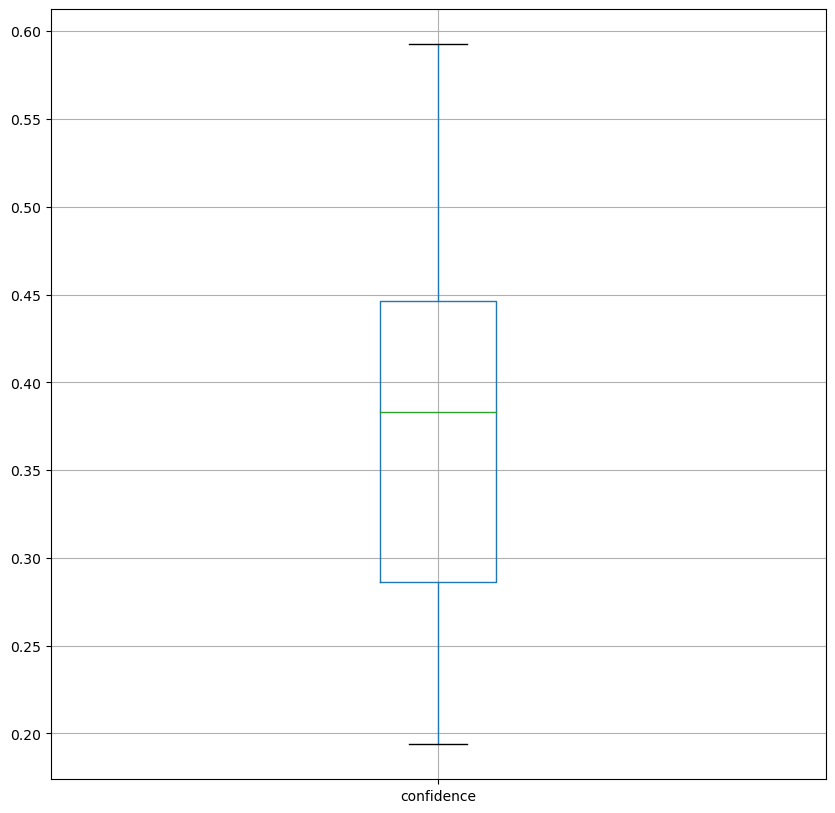

In [46]:
rules_c[['confidence']].boxplot()

**Using Lift Threshold**

In [47]:
rules_l=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules_l.sort_values('lift',ascending=False,inplace=True)
rules_l.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(youtube),(watch),0.0070,0.0102,0.0038,0.542857,53.221289,0.003729,2.165188,0.988127
9,(watch),(youtube),0.0102,0.0070,0.0038,0.372549,53.221289,0.003729,1.582594,0.991322
7,(icon),(sub),0.0122,0.0054,0.0032,0.262295,48.573163,0.003134,1.348236,0.991509
6,(sub),(icon),0.0054,0.0122,0.0032,0.592593,48.573163,0.003134,2.424600,0.984730
0,(bar),(sprite),0.0072,0.0134,0.0030,0.416667,31.094527,0.002904,1.691314,0.974859
1,(sprite),(bar),0.0134,0.0072,0.0030,0.223881,31.094527,0.002904,1.279185,0.980985
4,(sprite),(icon),0.0134,0.0122,0.0048,0.358209,29.361390,0.004637,1.539130,0.979061
5,(icon),(sprite),0.0122,0.0134,0.0048,0.393443,29.361390,0.004637,1.626557,0.977872
2,(judo),(bjj),0.0320,0.0136,0.0062,0.193750,14.246324,0.005765,1.223442,0.960544
3,(bjj),(judo),0.0136,0.0320,0.0062,0.455882,14.246324,0.005765,1.779027,0.942626


<Axes: >

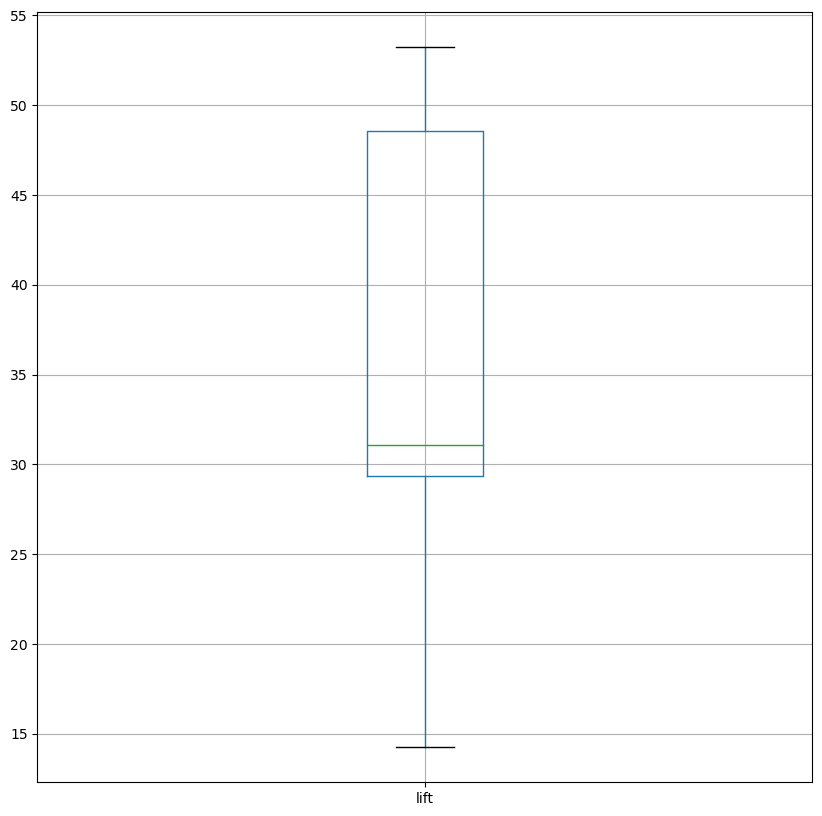

In [48]:
rules_l[['lift']].boxplot()

**Using both lift and confidence thresholds**

In [49]:
#option A
rules_c[(rules_c['lift']>=1.5)&(rules_c['confidence']>=0.35)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(sub),(icon),0.0054,0.0122,0.0032,0.592593,48.573163,0.003134,2.424600,0.984730
8,(youtube),(watch),0.0070,0.0102,0.0038,0.542857,53.221289,0.003729,2.165188,0.988127
3,(bjj),(judo),0.0136,0.0320,0.0062,0.455882,14.246324,0.005765,1.779027,0.942626
0,(bar),(sprite),0.0072,0.0134,0.0030,0.416667,31.094527,0.002904,1.691314,0.974859
5,(icon),(sprite),0.0122,0.0134,0.0048,0.393443,29.361390,0.004637,1.626557,0.977872
9,(watch),(youtube),0.0102,0.0070,0.0038,0.372549,53.221289,0.003729,1.582594,0.991322
4,(sprite),(icon),0.0134,0.0122,0.0048,0.358209,29.361390,0.004637,1.539130,0.979061


In [50]:
#option B setting lift to 2
rules_l[(rules_l['lift']>=2)&(rules_l['confidence']>=0.35)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(youtube),(watch),0.0070,0.0102,0.0038,0.542857,53.221289,0.003729,2.165188,0.988127
9,(watch),(youtube),0.0102,0.0070,0.0038,0.372549,53.221289,0.003729,1.582594,0.991322
6,(sub),(icon),0.0054,0.0122,0.0032,0.592593,48.573163,0.003134,2.424600,0.984730
0,(bar),(sprite),0.0072,0.0134,0.0030,0.416667,31.094527,0.002904,1.691314,0.974859
4,(sprite),(icon),0.0134,0.0122,0.0048,0.358209,29.361390,0.004637,1.539130,0.979061
5,(icon),(sprite),0.0122,0.0134,0.0048,0.393443,29.361390,0.004637,1.626557,0.977872
3,(bjj),(judo),0.0136,0.0320,0.0062,0.455882,14.246324,0.005765,1.779027,0.942626


**Generate Association rules for Soccer**

In [51]:

dat['keywords_list']=word_list
dat.head(1)

,text,category,text_clean,text_tokenized,text_no_stopwords,text_lemmatized,text_final,keywords,formatted_keywords,0,1,2,3,4,keywords_list
0,This is just an hypothesis on how I imagine an...,soccer,this is just an hypothesis on how i imagine an...,"[this, is, just, an, hypothesis, on, how, i, i...","[hypothesis, imagine, european, league, relega...","[hypothesis, imagine, european, league, relega...",hypothesis imagine european league relegation ...,"{'fc': 0.56, 'league': 0.389, 'team': 0.35, 'c...",fc league team champion play,fc,league,team,champion,play,"[fc, league, team, champion, play]"


In [52]:
#get all keywords from soccer category
soccer_data = dat[dat['category'] == 'soccer']
keywordsdf_soccer = soccer_data.iloc[:, 9:14]
keywords_list_soccer = pd.Series([])
for col in keywordsdf_soccer:
    keywords_list_soccer = keywords_list_soccer.append(keywordsdf_soccer[col].dropna())


print(keywords_list_soccer.value_counts())


player          80
team            74
sprite          73
league          72
icon            63
                ..
firm             1
increasingly     1
stated           1
fathi            1
athletic         1
Length: 1917, dtype: int64


C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\2878053798.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  keywords_list_soccer = pd.Series([])
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\2878053798.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_list_soccer = keywords_list_soccer.append(keywordsdf_soccer[col].dropna())
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\2878053798.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_list_soccer = keywords_list_soccer.append(keywordsdf_soccer[col].dropna())
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\2878053798.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a f

In [53]:
soccer_data

,text,category,text_clean,text_tokenized,text_no_stopwords,text_lemmatized,text_final,keywords,formatted_keywords,0,1,2,3,4,keywords_list
0,This is just an hypothesis on how I imagine an...,soccer,this is just an hypothesis on how i imagine an...,"[this, is, just, an, hypothesis, on, how, i, i...","[hypothesis, imagine, european, league, relega...","[hypothesis, imagine, european, league, relega...",hypothesis imagine european league relegation ...,"{'fc': 0.56, 'league': 0.389, 'team': 0.35, 'c...",fc league team champion play,fc,league,team,champion,play,"[fc, league, team, champion, play]"
3,Out of the u17 World Cup winners “top prospect...,soccer,out of the u world cup winners top prospects w...,"[out, of, the, u, world, cup, winners, top, pr...","[world, cup, winners, top, prospects, players,...","[world, cup, winner, top, prospect, player, ca...",world cup winner top prospect player career fa...,"{'career': 0.322, 'nelson': 0.288, 'ability': ...",career nelson ability winner pace,career,nelson,ability,winner,pace,"[career, nelson, ability, winner, pace]"
9,"Those who aren't the star players, maybe don't...",soccer,those who aren t the star players maybe don t ...,"[those, who, aren, t, the, star, players, mayb...","[aren, star, players, maybe, don, play, countr...","[aren, star, player, maybe, don, play, country...",aren star player maybe don play country league...,"{'country': 0.382, 'defender': 0.337, 'aren': ...",country defender aren marko polish,country,defender,aren,marko,polish,"[country, defender, aren, marko, polish]"
13,#[](#sprite8-p127) UEFA Youth League<lb><lb>--...,soccer,sprite p uefa youth league ro results sprite ...,"[, sprite, p, uefa, youth, league, ro, results...","[, sprite, uefa, youth, league, ro, results, s...","[, sprite, uefa, youth, league, ro, result, sp...",sprite uefa youth league ro result sprite par...,"{'bar': 0.688, 'sprite': 0.472, 'green': 0.461...",bar sprite green grey fc,bar,sprite,green,grey,fc,"[bar, sprite, green, grey, fc]"
27,Its been slowly creeping in with former refere...,soccer,its been slowly creeping in with former refere...,"[its, been, slowly, creeping, in, with, former...","[slowly, creeping, former, referees, taking, c...","[slowly, creeping, former, referee, taking, co...",slowly creeping former referee taking commenta...,"{'match': 0.333, 'discussion': 0.24, 'referee'...",match discussion referee stepped gifs,match,discussion,referee,stepped,gifs,"[match, discussion, referee, stepped, gifs]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,Because why the fuck not... I'll do my best to...,soccer,because why the fuck not i ll do my best to ma...,"[because, why, the, fuck, not, i, ll, do, my, ...","[fuck, ll, formatting, shitty, line, feyenoord...","[fuck, ll, formatting, shitty, line, feyenoord...",fuck ll formatting shitty line feyenoord jones...,"{'minute': 0.604, 'mixtape': 0.287, 'moe': 0.2...",minute mixtape moe mp watch,minute,mixtape,moe,mp,watch,"[minute, mixtape, moe, mp, watch]"
4984,#[](#sprite2-p22) Espanyol 1 - 0 **FC Barcelon...,soccer,sprite p espanyol fc barcelona sprite p copa ...,"[, sprite, p, espanyol, fc, barcelona, sprite,...","[, sprite, espanyol, fc, barcelona, sprite, co...","[, sprite, espanyol, fc, barcelona, sprite, co...",sprite espanyol fc barcelona sprite copa del ...,"{'icon': 0.69, 'yellow': 0.447, 'sprite': 0.42...",icon yellow sprite lopez espanyol,icon,yellow,sprite,lopez,espanyol,"[icon, yellow, sprite, lopez, espanyol]"
4992,#[](#sprite5-p12) ALAVÉS [](#sprite5-p12)<lb><...,soccer,sprite p alavés sprite p after the recent pre...,"[, sprite, p, alavés, sprite, p, after, the, r...","[, sprite, alavés, sprite, recent, premier, le...","[, sprite, alavés, sprite, recent, premier, le...",sprite alavés sprite recent premier league pr...,"{'alaves': 0.419, 'icon': 0.318, 'liga': 0.247...",alaves icon liga la trophy,alaves,icon,liga,la,trophy,"[alaves, icon, liga, la, trophy]"
4996,**FT: Manchester United 4 - 0 Wigan 

In [54]:
#Preprocess soccer keyword text
soccer_trans= []
for i in range(0, 1000):
    soccer_trans.append([str(keywordsdf_soccer.values[i, j]) for j in range(0, topn)])
soccer_trans = np.array(soccer_trans)

te_soccer = TransactionEncoder()
soccer_encoded = te_soccer.fit_transform(soccer_trans)
soccer_encoded = pd.DataFrame(soccer_encoded, columns = te_soccer.columns_)

# getting the shape of the data
soccer_encoded.shape

(1000, 1917)

**Generate frequent itemsets using Apriori algorithm for Soccer category**

In [55]:
frequent_keyword_soccer=apriori(soccer_encoded, min_support = 0.01, use_colnames = True)
frequent_keyword_soccer

,support,itemsets
0,0.016,(amp)
1,0.019,(arsenal)
2,0.016,(ball)
3,0.024,(bar)
4,0.016,(barcelona)
...,...,...
70,0.028,"(sprite, icon)"
71,0.021,"(sub, icon)"
72,0.015,"(yellow, icon)"
73,0.011,"(team, league)"


In [56]:
frequent_keyword_soccer[['support']].describe()

,support
count,75.000000
mean,0.021520
std,0.016316
min,0.010000
25%,0.012000
50%,0.016000
75%,0.023000
max,0.080000


In [57]:
rules_c_soccer = association_rules(frequent_keyword_soccer, metric="confidence", min_threshold=0.3)
rules_c_soccer.sort_values('confidence', ascending = False, inplace = True)
rules_c_soccer.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(sub),(icon),0.029,0.063,0.021,0.724138,11.494253,0.019173,3.396625,0.940268
10,(youtube),(watch),0.018,0.018,0.013,0.722222,40.123457,0.012676,3.535200,0.992950
11,(watch),(youtube),0.018,0.018,0.013,0.722222,40.123457,0.012676,3.535200,0.992950
9,(yellow),(icon),0.021,0.063,0.015,0.714286,11.337868,0.013677,3.279500,0.931359
3,(world),(cup),0.022,0.039,0.015,0.681818,17.482517,0.014142,3.020286,0.964008
1,(bar),(sprite),0.024,0.073,0.016,0.666667,9.132420,0.014248,2.781000,0.912398
0,(bar),(icon),0.024,0.063,0.012,0.500000,7.936508,0.010488,1.874000,0.895492
6,(icon),(sprite),0.063,0.073,0.028,0.444444,6.088280,0.023401,1.668600,0.891942
4,(cup),(world),0.039,0.022,0.015,0.384615,17.482517,0.014142,1.589250,0.981061
5,(sprite),(icon),0.073,0.063,0.028,0.383562,6.088280,0.023401,1.520022,0.901564


<Axes: >

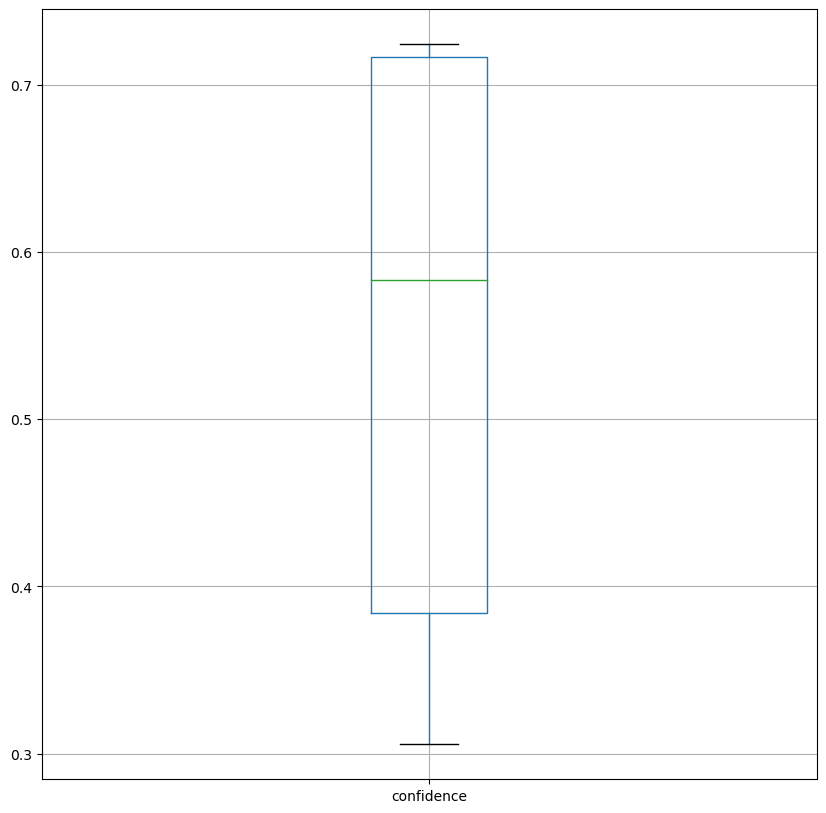

In [58]:
rules_c_soccer[['confidence']].boxplot()

In [59]:
#using lift
rules_l_soccer = association_rules(frequent_keyword_soccer, metric="lift", min_threshold=1)
rules_l_soccer

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bar),(icon),0.024,0.063,0.012,0.500000,7.936508,0.010488,1.874000,0.895492
1,(icon),(bar),0.063,0.024,0.012,0.190476,7.936508,0.010488,1.205647,0.932764
2,(bar),(sprite),0.024,0.073,0.016,0.666667,9.132420,0.014248,2.781000,0.912398
3,(sprite),(bar),0.073,0.024,0.016,0.219178,9.132420,0.014248,1.249965,0.960626
4,(player),(club),0.080,0.036,0.011,0.137500,3.819444,0.008120,1.117681,0.802372
5,(club),(player),0.036,0.080,0.011,0.305556,3.819444,0.008120,1.324800,0.765749
6,(world),(cup),0.022,0.039,0.015,0.681818,17.482517,0.014142,3.020286,0.964008
7,(cup),(world),0.039,0.022,0.015,0.384615,17.482517,0.014142,1.589250,0.981061
8,(sprite),(icon),0.073,0.063,0.028,0.383562,6.088280,0.023401,1.520022,0.901564
9,(icon),(sprite),0.063,0.073,0.028,0.444444,6.088280,0.023401,1.668600,0.891942


<Axes: >

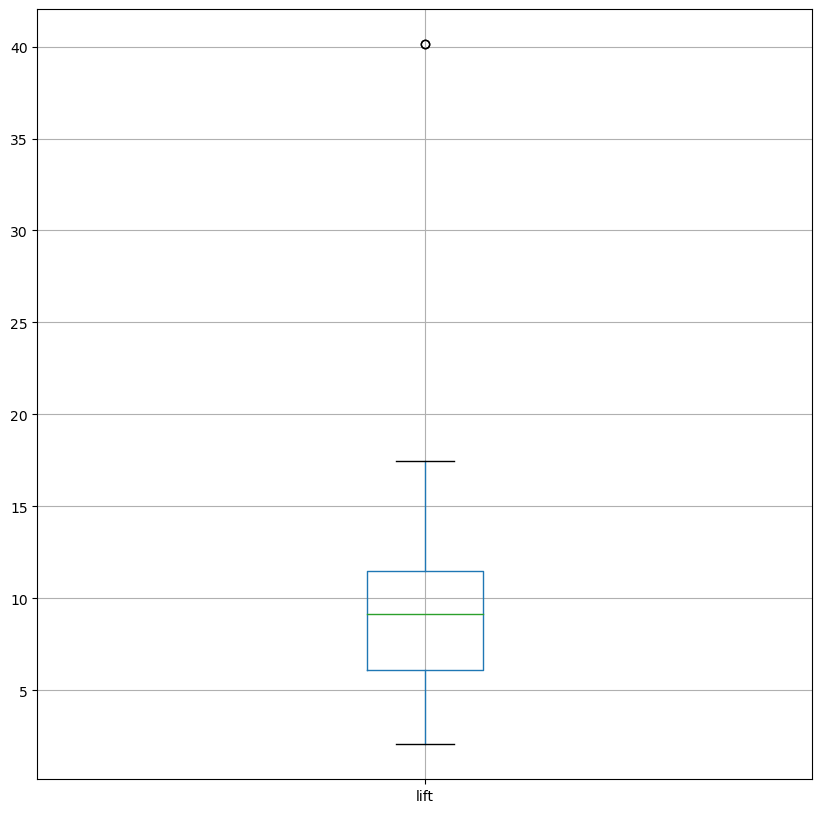

In [60]:
rules_l_soccer[['lift']].boxplot()

In [61]:
#both threshold
# Option A
rules_c_soccer[ (rules_c_soccer['lift'] >= 2) &
       (rules_c_soccer['confidence'] >= 0.35) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(sub),(icon),0.029,0.063,0.021,0.724138,11.494253,0.019173,3.396625,0.940268
10,(youtube),(watch),0.018,0.018,0.013,0.722222,40.123457,0.012676,3.535200,0.992950
11,(watch),(youtube),0.018,0.018,0.013,0.722222,40.123457,0.012676,3.535200,0.992950
9,(yellow),(icon),0.021,0.063,0.015,0.714286,11.337868,0.013677,3.279500,0.931359
3,(world),(cup),0.022,0.039,0.015,0.681818,17.482517,0.014142,3.020286,0.964008
1,(bar),(sprite),0.024,0.073,0.016,0.666667,9.132420,0.014248,2.781000,0.912398
0,(bar),(icon),0.024,0.063,0.012,0.500000,7.936508,0.010488,1.874000,0.895492
6,(icon),(sprite),0.063,0.073,0.028,0.444444,6.088280,0.023401,1.668600,0.891942
4,(cup),(world),0.039,0.022,0.015,0.384615,17.482517,0.014142,1.589250,0.981061
5,(sprite),(icon),0.073,0.063,0.028,0.383562,6.088280,0.023401,1.520022,0.901564


In [62]:
# Option B
rules_l_soccer[ (rules_l_soccer['lift'] >= 2) &
       (rules_l_soccer['confidence'] >= 0.35) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bar),(icon),0.024,0.063,0.012,0.500000,7.936508,0.010488,1.874000,0.895492
2,(bar),(sprite),0.024,0.073,0.016,0.666667,9.132420,0.014248,2.781000,0.912398
6,(world),(cup),0.022,0.039,0.015,0.681818,17.482517,0.014142,3.020286,0.964008
7,(cup),(world),0.039,0.022,0.015,0.384615,17.482517,0.014142,1.589250,0.981061
8,(sprite),(icon),0.073,0.063,0.028,0.383562,6.088280,0.023401,1.520022,0.901564
9,(icon),(sprite),0.063,0.073,0.028,0.444444,6.088280,0.023401,1.668600,0.891942
10,(sub),(icon),0.029,0.063,0.021,0.724138,11.494253,0.019173,3.396625,0.940268
12,(yellow),(icon),0.021,0.063,0.015,0.714286,11.337868,0.013677,3.279500,0.931359
16,(youtube),(watch),0.018,0.018,0.013,0.722222,40.123457,0.012676,3.535200,0.992950
17,(watch),(youtube),0.018,0.018,0.013,0.722222,40.123457,0.012676,3.535200,0.992950


**Generate for Snowboarding**

In [63]:
#get all snowboarding keywords
snowboarding_data = dat[dat["category"]== 'snowboarding']
snowboarding_df=snowboarding_data.iloc[:,9:14]
snowboarding_list=pd.Series([])
for col in snowboarding_df:
    snowboarding_list = snowboarding_list.append(snowboarding_df[col].dropna())
snowboarding_data


C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\2100132984.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  snowboarding_list=pd.Series([])
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\2100132984.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  snowboarding_list = snowboarding_list.append(snowboarding_df[col].dropna())
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\2100132984.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  snowboarding_list = snowboarding_list.append(snowboarding_df[col].dropna())
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\2100132984.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pa

,text,category,text_clean,text_tokenized,text_no_stopwords,text_lemmatized,text_final,keywords,formatted_keywords,0,1,2,3,4,keywords_list
1,"Hey community, I want to get your opinion on w...",snowboarding,hey community i want to get your opinion on wh...,"[hey, community, i, want, to, get, your, opini...","[hey, community, opinion, vail, resorts, mount...","[hey, community, opinion, vail, resort, mounta...",hey community opinion vail resort mountain pas...,"{'vail': 0.487, 'beaver': 0.28, 'creek': 0.255...",vail beaver creek keystone utah,vail,beaver,creek,keystone,utah,"[vail, beaver, creek, keystone, utah]"
7,Me and a few friends with epic passes are plan...,snowboarding,me and a few friends with epic passes are plan...,"[me, and, a, few, friends, with, epic, passes,...","[friends, epic, passes, planning, trip, tahoe,...","[friend, epic, pass, planning, trip, tahoe, wo...",friend epic pass planning trip tahoe wondering...,"{'northstar': 0.404, 'kirkwood': 0.375, 'heave...",northstar kirkwood heavenly epic terrain,northstar,kirkwood,heavenly,epic,terrain,"[northstar, kirkwood, heavenly, epic, terrain]"
12,Just wanted to share something. The general co...,snowboarding,just wanted to share something the general con...,"[just, wanted, to, share, something, the, gene...","[share, consensus, teach, snowboarding, nope, ...","[share, consensus, teach, snowboarding, nope, ...",share consensus teach snowboarding nope don le...,"{'lesson': 0.403, 'channel': 0.339, 'share': 0...",lesson channel share youtube besides,lesson,channel,share,youtube,besides,"[lesson, channel, share, youtube, besides]"
14,"Hey Everybody,<lb><lb>Been riding about 10 yea...",snowboarding,hey everybody been riding about years now can ...,"[hey, everybody, been, riding, about, years, n...","[hey, riding, ve, wolrd, colorado, mexico, whi...","[hey, riding, ve, wolrd, colorado, mexico, whi...",hey riding ve wolrd colorado mexico whistler h...,"{'heli': 0.368, 'cliff': 0.219, 'bowl': 0.213,...",heli cliff bowl ice expert,heli,cliff,bowl,ice,expert,"[heli, cliff, bowl, ice, expert]"
15,I'm hyped up. Last season I was struggling wit...,snowboarding,i m hyped up last season i was struggling with...,"[i, m, hyped, up, last, season, i, was, strugg...","[hyped, season, struggling, blue, squares, boa...","[hyped, season, struggling, blue, square, boar...",hyped season struggling blue square board time...,"{'blue': 0.448, 'hyped': 0.349, 'rush': 0.325,...",blue hyped rush square diamond,blue,hyped,rush,square,diamond,"[blue, hyped, rush, square, diamond]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,Hey all - so I'm prepping for my first snowboa...,snowboarding,hey all so i m prepping for my first snowboard...,"[hey, all, so, i, m, prepping, for, my, first,...","[hey, prepping, snowboarding, trip, time, sky,...","[hey, prepping, snowboarding, trip, time, sky,...",hey prepping snowboarding trip time sky girlfr...,"{'lift': 0.362, 'helmet': 0.28, 'ticket': 0.26...",lift helmet ticket snowboarding bluetooth,lift,helmet,ticket,snowboarding,bluetooth,"[lift, helmet, ticket, snowboarding, bluetooth]"
4972,"Hey folks! My wife and I are from Minnesota, a...",snowboarding,hey folks my wife and i are from minnesota and...,"[hey, folks, my, wife, and, i, are, from, minn...","[hey, folks, wife, minnesota, re, heading, roc...","[hey, folk, wife, minnesota, re, heading, rock...",hey folk wife minnesota re heading rocky mount...,"{'late': 0.385, 'mountain': 0.315, 'aspen': 0....",late mountain aspen season heading,late,mountain,aspen,season,heading,"[late, mountain, aspen, season, heading]"
4974,Hey I wonder if you guys could please help. I'...,snowboarding,hey i wonder if you guys could please help i m...,"[hey, i, wonder, if, you, guys, could, please,...","[hey, wonder, guys, please, help, looking, sno...","[hey, wonder, guy, please, help, looking, snow...",hey wonder guy please help looking snowboardin...,"{'sound': 0.259, 'similar': 0.221, 'music': 0....",sound

In [64]:
#preprocess the text
snowboarding_trans = []
for i in range(0, 1000):
    snowboarding_trans.append([str(snowboarding_df.values[i, j]) for j in range(0, topn)])

snowboarding_trans = np.array(snowboarding_trans)



te_snowboarding = TransactionEncoder()
snowboarding_encoded = te_snowboarding.fit_transform(snowboarding_trans)
snowboarding_encoded = pd.DataFrame(snowboarding_encoded, columns = te_snowboarding.columns_)

# getting the shape of the data
snowboarding_encoded.shape

(1000, 2060)

**Generate Frequent itemsets using Apriori algorithm for snowboarding category**


In [65]:
frequent_keyword_snowboarding=apriori(snowboarding_encoded, min_support = 0.006, use_colnames = True)
frequent_keyword_snowboarding

,support,itemsets
0,0.006,(accommodation)
1,0.008,(advice)
2,0.008,(air)
3,0.007,(alp)
4,0.010,(amp)
...,...,...
142,0.006,"(camber, board)"
143,0.006,"(park, board)"
144,0.006,"(board, ride)"
145,0.006,"(tremblant, mont)"


In [66]:
frequent_keyword_snowboarding[['support']].describe()

,support
count,147.000000
mean,0.010714
std,0.009832
min,0.006000
25%,0.006000
50%,0.008000
75%,0.010000
max,0.086000


In [161]:
rules_c_snowboarding = association_rules(frequent_keyword_snowboarding, metric="confidence", min_threshold=0.1)
rules_c_snowboarding.sort_values('confidence', ascending = False, inplace = True)
rules_c_snowboarding.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(mont),(tremblant),0.006,0.008,0.006,1.000000,125.000000,0.005952,inf,0.997988
3,(tremblant),(mont),0.008,0.006,0.006,0.750000,125.000000,0.005952,3.976000,1.000000
0,(camber),(board),0.010,0.086,0.006,0.600000,6.976744,0.005140,2.285000,0.865320
1,(park),(board),0.020,0.086,0.006,0.300000,3.488372,0.004280,1.305714,0.727891
2,(ride),(board),0.030,0.086,0.006,0.200000,2.325581,0.003420,1.142500,0.587629
6,(snowboard),(snowboarding),0.041,0.045,0.006,0.146341,3.252033,0.004155,1.118714,0.722106
5,(snowboarding),(snowboard),0.045,0.041,0.006,0.133333,3.252033,0.004155,1.106538,0.725131


<Axes: >

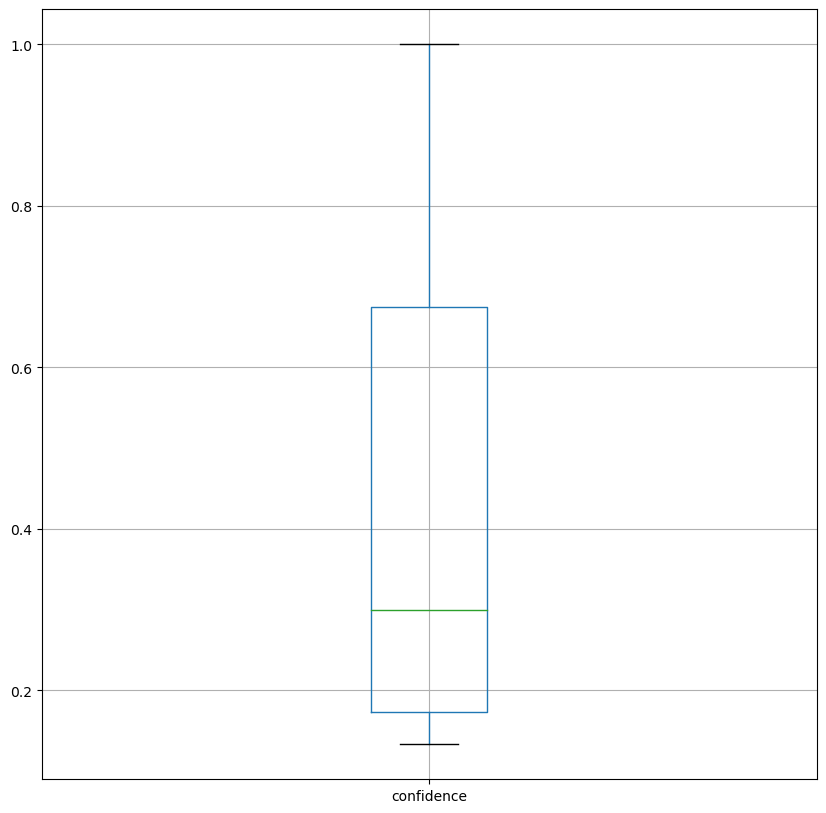

In [68]:
rules_c_snowboarding[['confidence']].boxplot()

In [137]:
rules_l_snowboarding = association_rules(frequent_keyword_snowboarding, metric="lift", min_threshold=1)
rules_l_snowboarding.sort_values('lift', ascending = False, inplace = True)
rules_l_snowboarding

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(tremblant),(mont),0.008,0.006,0.006,0.750000,125.000000,0.005952,3.976000,1.000000
7,(mont),(tremblant),0.006,0.008,0.006,1.000000,125.000000,0.005952,inf,0.997988
1,(board),(camber),0.086,0.010,0.006,0.069767,6.976744,0.005140,1.064250,0.937272
0,(camber),(board),0.010,0.086,0.006,0.600000,6.976744,0.005140,2.285000,0.865320
3,(board),(park),0.086,0.020,0.006,0.069767,3.488372,0.004280,1.053500,0.780452
2,(park),(board),0.020,0.086,0.006,0.300000,3.488372,0.004280,1.305714,0.727891
8,(snowboarding),(snowboard),0.045,0.041,0.006,0.133333,3.252033,0.004155,1.106538,0.725131
9,(snowboard),(snowboarding),0.041,0.045,0.006,0.146341,3.252033,0.004155,1.118714,0.722106
4,(board),(ride),0.086,0.030,0.006,0.069767,2.325581,0.003420,1.042750,0.623632
5,(ride),(board),0.030,0.086,0.006,0.200000,2.325581,0.003420,1.142500,0.587629


<Axes: >

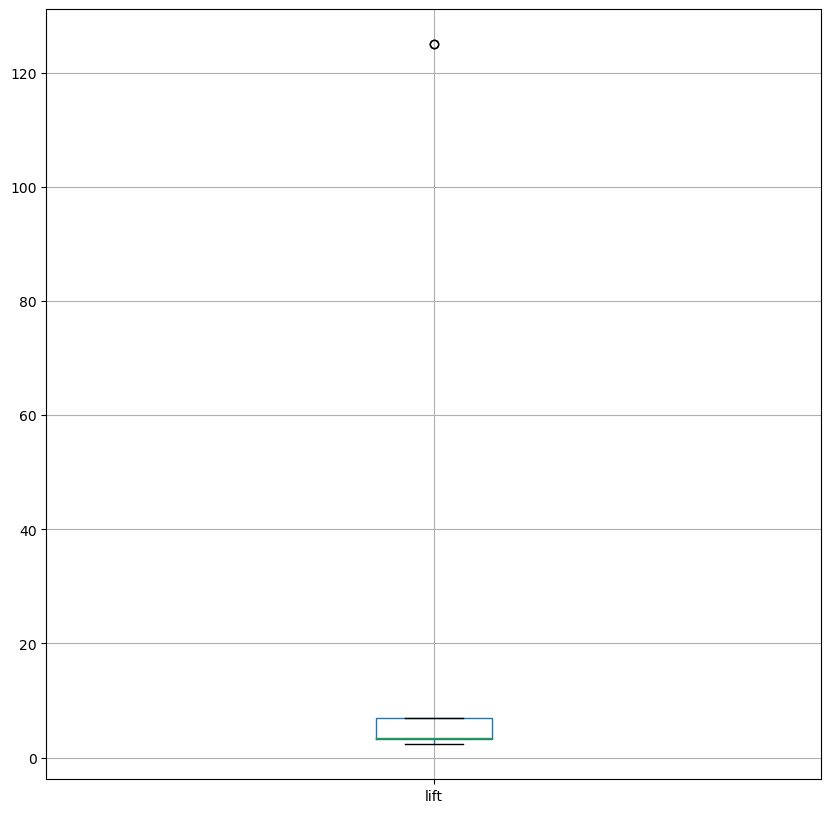

In [138]:
rules_l_snowboarding[['lift']].boxplot()

In [71]:
# Both thresholds
# Option A
rules_c_snowboarding[ (rules_c_snowboarding['lift'] >= 2) &
       (rules_c_snowboarding['confidence'] >= 0.35) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(mont),(tremblant),0.006,0.008,0.006,1.00,125.000000,0.005952,inf,0.997988
3,(tremblant),(mont),0.008,0.006,0.006,0.75,125.000000,0.005952,3.976,1.000000
0,(camber),(board),0.010,0.086,0.006,0.60,6.976744,0.005140,2.285,0.865320


In [72]:
# Option B
rules_l_snowboarding[ (rules_l_snowboarding['lift'] >= 2) &
       (rules_l_snowboarding['confidence'] >= 0.35) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(tremblant),(mont),0.008,0.006,0.006,0.75,125.000000,0.005952,3.976,1.000000
7,(mont),(tremblant),0.006,0.008,0.006,1.00,125.000000,0.005952,inf,0.997988
0,(camber),(board),0.010,0.086,0.006,0.60,6.976744,0.005140,2.285,0.865320


**Generate for Triathlon**


In [73]:
#get all Trialthon keywords
triathlon_data = dat[dat['category']== 'triathlon']
triathlon_df=triathlon_data.iloc[:,9:14]
triathlon_list=pd.Series([])
for col in triathlon_df:
    triathlon_list = triathlon_list.append(triathlon_df[col].dropna())
triathlon_data
print(triathlon_list.value_counts())
print(triathlon_data)

bike            174
race             99
swim             87
training         76
tri              67
               ... 
mouth             1
surprised         1
chip              1
inconsistent      1
yearly            1
Length: 1876, dtype: int64
                                                   text   category  \
2     I have a roubaix road bike with aero bars and ...  triathlon   
10    I just started tris in 2016, ending the season...  triathlon   
24    I picked up a new commuter today at my LBS for...  triathlon   
31    <lb>Hi everybody - Outside of the normal resou...  triathlon   
49    Lots of people here have things to say, so it ...  triathlon   
...                                                 ...        ...   
4987  Trying to get into triathlons. I have a backgr...  triathlon   
4988  My 'A' race is IMMD in Oct. However, I saw on ...  triathlon   
4990  What do you do to make life better for the spe...  triathlon   
4994  Wondering if I should upgrade and buy a bike c.

C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\339999944.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  triathlon_list=pd.Series([])
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\339999944.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  triathlon_list = triathlon_list.append(triathlon_df[col].dropna())
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\339999944.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  triathlon_list = triathlon_list.append(triathlon_df[col].dropna())
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\339999944.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tr

In [74]:
#preprocess the text
triathlon_trans = []
for i in range(0, 1000):
    triathlon_trans.append([str(triathlon_df.values[i, j]) for j in range(0, topn)])

triathlon_trans = np.array(triathlon_trans)



te_triathlon = TransactionEncoder()
triathlon_encoded = te_triathlon.fit_transform(triathlon_trans)
triathlon_encoded = pd.DataFrame(triathlon_encoded, columns = te_triathlon.columns_)

# getting the shape of the data
triathlon_encoded.shape

(1000, 1876)

**Generate Frequent itemsets using Apriori algorithm for Trialthon category**


In [148]:
frequent_keyword_triathlon=apriori(triathlon_encoded, min_support = 0.006, use_colnames = True)
frequent_keyword_triathlon

,support,itemsets
0,0.013,(aero)
1,0.006,(ag)
2,0.009,(amp)
3,0.006,(apple)
4,0.012,(bar)
...,...,...
155,0.006,"(training, triathlon)"
156,0.006,"(training, weight)"
157,0.006,"(training, workout)"
158,0.007,"(bike, mile, swim)"


In [149]:
frequent_keyword_triathlon[['support']].describe()

,support
count,160.000000
mean,0.014031
std,0.018666
min,0.006000
25%,0.006000
50%,0.008000
75%,0.013000
max,0.174000


In [150]:
rules_c_triathlon = association_rules(frequent_keyword_triathlon, metric="confidence", min_threshold=0.5)
rules_c_triathlon.sort_values('confidence', ascending = False, inplace = True)
rules_c_triathlon

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,"(run, swim)",(bike),0.009,0.174,0.008,0.888889,5.108557,0.006434,7.434000,0.811554
2,(buy),(bike),0.007,0.174,0.006,0.857143,4.926108,0.004782,5.782000,0.802618
7,(rate),(heart),0.007,0.008,0.006,0.857143,107.142857,0.005944,6.944000,0.997650
10,(suit),(tri),0.009,0.067,0.007,0.777778,11.608624,0.006397,4.198500,0.922157
8,(heart),(rate),0.008,0.007,0.006,0.750000,107.142857,0.005944,3.972000,0.998656
5,(tt),(bike),0.011,0.174,0.008,0.727273,4.179728,0.006086,3.028667,0.769211
4,(road),(bike),0.026,0.174,0.018,0.692308,3.978780,0.013476,2.684500,0.768652
3,(fit),(bike),0.011,0.174,0.007,0.636364,3.657262,0.005086,2.271500,0.734653
1,(aero),(bike),0.013,0.174,0.008,0.615385,3.536693,0.005738,2.147600,0.726697
12,"(mile, swim)",(bike),0.012,0.174,0.007,0.583333,3.352490,0.004912,1.982400,0.710237


<Axes: >

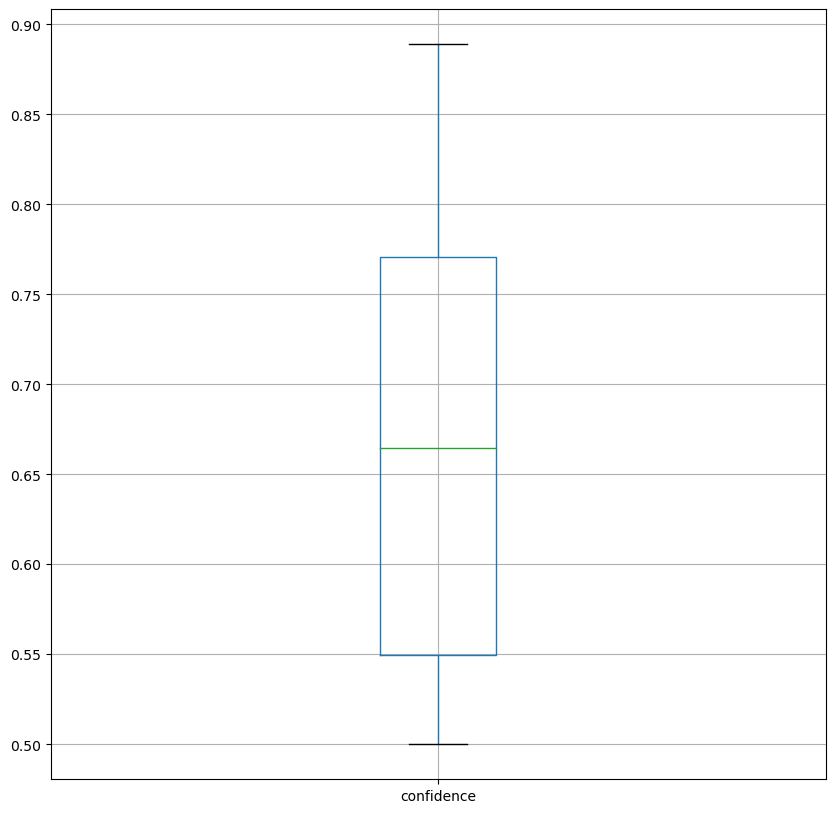

In [151]:
rules_c_triathlon[['confidence']].boxplot()

In [152]:
rules_l_triathlon = association_rules(frequent_keyword_triathlon, metric="lift", min_threshold=1)
rules_l_triathlon.sort_values('lift', ascending = False, inplace = True)
rules_l_triathlon

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(rate),(heart),0.007,0.008,0.006,0.857143,107.142857,0.005944,6.944000,0.997650
27,(heart),(rate),0.008,0.007,0.006,0.750000,107.142857,0.005944,3.972000,0.998656
0,(aero),(bar),0.013,0.012,0.006,0.461538,38.461538,0.005844,1.834857,0.986829
1,(bar),(aero),0.012,0.013,0.006,0.500000,38.461538,0.005844,1.974000,0.985830
22,(carbon),(wheel),0.013,0.016,0.007,0.538462,33.653846,0.006792,2.132000,0.983066
...,...,...,...,...,...,...,...,...,...,...
9,(km),(bike),0.026,0.174,0.006,0.230769,1.326260,0.001476,1.073800,0.252567
16,(bike),(swim),0.174,0.087,0.018,0.103448,1.189061,0.002862,1.018346,0.192494
17,(swim),(bike),0.087,0.174,0.018,0.206897,1.189061,0.002862,1.041478,0.174151
45,(swim),(race),0.087,0.099,0.009,0.103448,1.044932,0.000387,1.004962,0.047097


<Axes: >

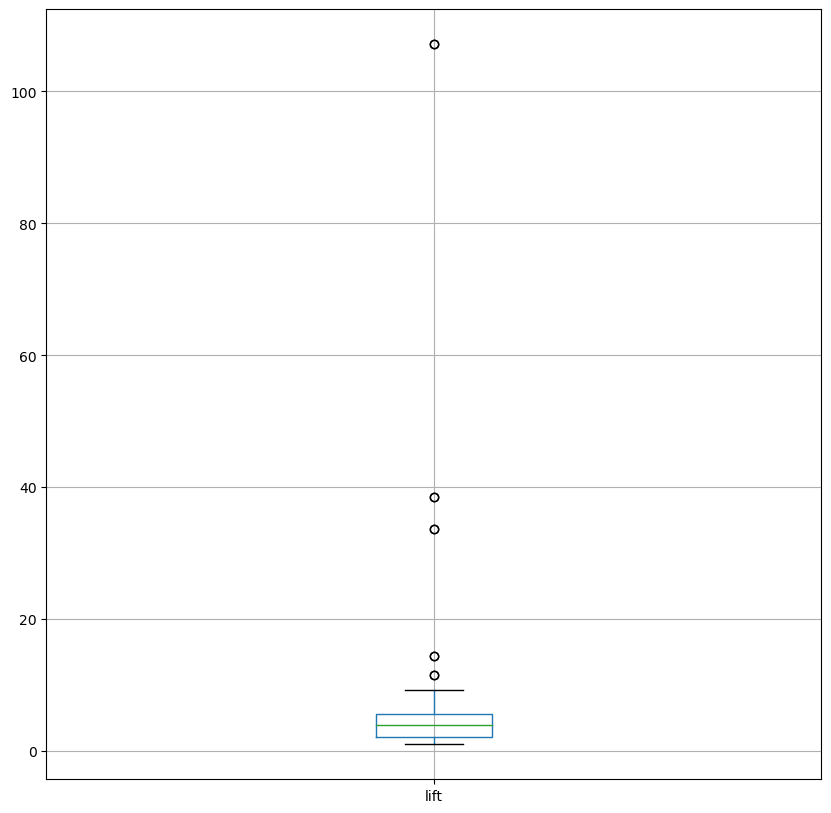

In [153]:
rules_l_triathlon[['lift']].boxplot()

In [154]:
# Both thresholds
# Option A
rules_c_triathlon[ (rules_c_triathlon['lift'] >= 2) &
       (rules_c_triathlon['confidence'] >= 0.35) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,"(run, swim)",(bike),0.009,0.174,0.008,0.888889,5.108557,0.006434,7.434000,0.811554
2,(buy),(bike),0.007,0.174,0.006,0.857143,4.926108,0.004782,5.782000,0.802618
7,(rate),(heart),0.007,0.008,0.006,0.857143,107.142857,0.005944,6.944000,0.997650
10,(suit),(tri),0.009,0.067,0.007,0.777778,11.608624,0.006397,4.198500,0.922157
8,(heart),(rate),0.008,0.007,0.006,0.750000,107.142857,0.005944,3.972000,0.998656
5,(tt),(bike),0.011,0.174,0.008,0.727273,4.179728,0.006086,3.028667,0.769211
4,(road),(bike),0.026,0.174,0.018,0.692308,3.978780,0.013476,2.684500,0.768652
3,(fit),(bike),0.011,0.174,0.007,0.636364,3.657262,0.005086,2.271500,0.734653
1,(aero),(bike),0.013,0.174,0.008,0.615385,3.536693,0.005738,2.147600,0.726697
12,"(mile, swim)",(bike),0.012,0.174,0.007,0.583333,3.352490,0.004912,1.982400,0.710237


In [155]:
# Option B
rules_l_triathlon[ (rules_l_triathlon['lift'] >= 2) &
       (rules_l_triathlon['confidence'] >= 0.35) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(rate),(heart),0.007,0.008,0.006,0.857143,107.142857,0.005944,6.944000,0.997650
27,(heart),(rate),0.008,0.007,0.006,0.750000,107.142857,0.005944,3.972000,0.998656
0,(aero),(bar),0.013,0.012,0.006,0.461538,38.461538,0.005844,1.834857,0.986829
1,(bar),(aero),0.012,0.013,0.006,0.500000,38.461538,0.005844,1.974000,0.985830
22,(carbon),(wheel),0.013,0.016,0.007,0.538462,33.653846,0.006792,2.132000,0.983066
23,(wheel),(carbon),0.016,0.013,0.007,0.437500,33.653846,0.006792,1.754667,0.986063
53,(suit),(tri),0.009,0.067,0.007,0.777778,11.608624,0.006397,4.198500,0.922157
71,"(bike, swim)",(run),0.018,0.048,0.008,0.444444,9.259259,0.007136,1.713600,0.908350
65,"(bike, swim)",(mile),0.018,0.052,0.007,0.388889,7.478632,0.006064,1.551273,0.882165
64,"(bike, mile)",(swim),0.013,0.087,0.007,0.538462,6.189213,0.005869,1.978167,0.849472


**Generate for Judo**

In [83]:
#get all judo keywords
judo_data = dat[dat["category"]== 'judo']
judo_df=judo_data.iloc[:,9:14]
judo_list=pd.Series([])
for col in judo_df:
    judo_list =judo_list.append(judo_df[col].dropna())
judo_data


C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\2666213530.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  judo_list=pd.Series([])
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\2666213530.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  judo_list =judo_list.append(judo_df[col].dropna())
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\2666213530.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  judo_list =judo_list.append(judo_df[col].dropna())
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\2666213530.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  judo_list =judo_list.append(judo_df

,text,category,text_clean,text_tokenized,text_no_stopwords,text_lemmatized,text_final,keywords,formatted_keywords,0,1,2,3,4,keywords_list
4,A while ago I quit Judo and since then I've da...,judo,a while ago i quit judo and since then i ve da...,"[a, while, ago, i, quit, judo, and, since, the...","[ago, quit, judo, ve, dabbled, lot, martial, a...","[ago, quit, judo, ve, dabbled, lot, martial, a...",ago quit judo ve dabbled lot martial art recen...,"{'judo': 0.439, 'hop': 0.256, 'lastly': 0.241,...",judo hop lastly submission legal,judo,hop,lastly,submission,legal,"[judo, hop, lastly, submission, legal]"
5,"Hey guys, I've never had judo experience but I...",judo,hey guys i ve never had judo experience but i ...,"[hey, guys, i, ve, never, had, judo, experienc...","[hey, guys, ve, judo, experience, kyoto, japan...","[hey, guy, ve, judo, experience, kyoto, japan,...",hey guy ve judo experience kyoto japan month e...,"{'uni': 0.424, 'look': 0.242, 'mma': 0.231, 'j...",uni look mma join club,uni,look,mma,join,club,"[uni, look, mma, join, club]"
6,Is this normal? We had a small class the last ...,judo,is this normal we had a small class the last t...,"[is, this, normal, we, had, a, small, class, t...","[normal, class, time, doing, various, ground, ...","[normal, class, time, doing, various, ground, ...",normal class time doing various ground exercis...,"{'bruised': 0.292, 'woke': 0.284, 'sparring': ...",bruised woke sparring caused btw,bruised,woke,sparring,caused,btw,"[bruised, woke, sparring, caused, btw]"
11,"Hi my fellow Judokas, so i have an opponent wh...",judo,hi my fellow judokas so i have an opponent who...,"[hi, my, fellow, judokas, so, i, have, an, opp...","[hi, fellow, judokas, opponent, taller, likes,...","[hi, fellow, judokas, opponent, taller, like, ...",hi fellow judokas opponent taller like overhan...,"{'duck': 0.497, 'grip': 0.395, 'lapel': 0.242,...",duck grip lapel osoto gari,duck,grip,lapel,osoto,gari,"[duck, grip, lapel, osoto, gari]"
18,I'm a white belt and whenever we practice grou...,judo,i m a white belt and whenever we practice grou...,"[i, m, a, white, belt, and, whenever, we, prac...","[white, belt, whenever, practice, groundwork, ...","[white, belt, whenever, practice, groundwork, ...",white belt whenever practice groundwork ne waz...,"{'groundwork': 0.33, 'accepted': 0.325, 'slidi...",groundwork accepted sliding doesnt ne,groundwork,accepted,sliding,doesnt,ne,"[groundwork, accepted, sliding, doesnt, ne]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,"Hi guys,<lb><lb>I started training judo at the...",judo,hi guys i started training judo at the budokwa...,"[hi, guys, i, started, training, judo, at, the...","[hi, guys, started, training, judo, budokwai, ...","[hi, guy, started, training, judo, budokwai, l...",hi guy started training judo budokwai london a...,"{'rugby': 0.291, 'elite': 0.252, 'beginner': 0...",rugby elite beginner serious dojo,rugby,elite,beginner,serious,dojo,"[rugby, elite, beginner, serious, dojo]"
4965,"After searching all over the internet,I can't ...",judo,after searching all over the internet i can t ...,"[after, searching, all, over, the, internet, i...","[searching, internet, data, licensed, judo, co...","[searching, internet, data, licensed, judo, co...",searching internet data licensed judo coach ja...,"{'japanese': 0.446, 'japan': 0.384, 'federatio...",japanese japan federation equal speak,japanese,japan,federation,equal,speak,"[japanese, japan, federation, equal, speak]"
4975,But the only thing I feel like I'm not doing w...,judo,but the only thing i feel like i m not doing w...,"[but, the, only, thing, i, feel, like, i, m, n...","[feel, doing, wrong, ukemi, practiced, bit, ea...","[feel, doing, wrong, ukemi, practiced, bit, ea...",feel doing wrong ukemi practiced bit earlier b...,"{'footwork': 0.375, 'class': 0.347, 'trip': 0....",footwork class trip practiced lazy,footwork,class,trip,practiced,lazy,"[footwork, class, trip, practiced, lazy]"
4986,BJJ is 

In [84]:
#preprocess the text
judo_trans = []
for i in range(0, 1000):
    judo_trans.append([str(judo_df.values[i, j]) for j in range(0, topn)])

judo_trans = np.array(judo_trans)



te_judo = TransactionEncoder()
judo_encoded = te_judo.fit_transform(judo_trans)
judo_encoded = pd.DataFrame(judo_encoded, columns = te_judo.columns_)

# getting the shape of the data
judo_encoded.shape

(1000, 1910)

**Generate Frequent itemsets using Apriori algorithm for Judo category**


In [85]:
frequent_keyword_judo=apriori(judo_encoded, min_support = 0.006, use_colnames = True)
frequent_keyword_judo

,support,itemsets
0,0.009,(adult)
1,0.006,(aikido)
2,0.008,(amp)
3,0.011,(arm)
4,0.017,(art)
...,...,...
161,0.006,"(leg, throw)"
162,0.006,"(uchi, mata)"
163,0.007,"(nage, seoi)"
164,0.006,"(youtube, watch)"


In [86]:
frequent_keyword_judo[['support']].describe()

,support
count,166.000000
mean,0.012886
std,0.017441
min,0.006000
25%,0.007000
50%,0.009000
75%,0.012000
max,0.185000


In [87]:
rules_c_judo = association_rules(frequent_keyword_judo, metric="confidence", min_threshold=0.5)
rules_c_judo.sort_values('confidence', ascending = False, inplace = True)
rules_c_judo

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(jiu),(jitsu),0.008,0.009,0.008,1.000000,111.111111,0.007928,inf,0.998992
6,(jitsu),(jiu),0.009,0.008,0.008,0.888889,111.111111,0.007928,8.928000,1.000000
2,(black),(belt),0.008,0.076,0.007,0.875000,11.513158,0.006392,7.392000,0.920507
3,(green),(belt),0.008,0.076,0.007,0.875000,11.513158,0.006392,7.392000,0.920507
9,(mata),(uchi),0.007,0.012,0.006,0.857143,71.428571,0.005916,6.916000,0.992951
15,"(bjj, gi)",(judo),0.007,0.185,0.006,0.857143,4.633205,0.004705,5.705000,0.789695
1,(martial),(art),0.014,0.017,0.011,0.785714,46.218487,0.010762,4.587333,0.992255
12,(youtube),(watch),0.009,0.009,0.006,0.666667,74.074074,0.005919,2.973000,0.995459
13,(watch),(youtube),0.009,0.009,0.006,0.666667,74.074074,0.005919,2.973000,0.995459
0,(art),(martial),0.017,0.014,0.011,0.647059,46.218487,0.010762,2.793667,0.995283


<Axes: >

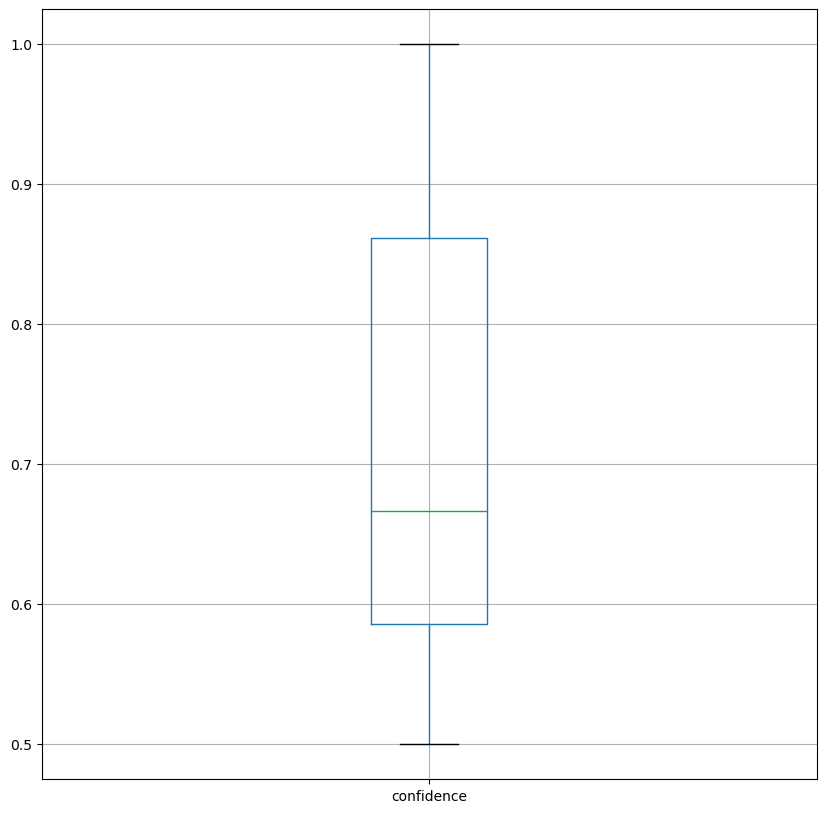

In [88]:
rules_c_judo[['confidence']].boxplot()

In [157]:
rules_l_judo = association_rules(frequent_keyword_judo, metric="lift", min_threshold=1)
rules_l_judo.sort_values('lift', ascending = False, inplace = True)
rules_l_judo.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23,(jiu),(jitsu),0.008,0.009,0.008,1.000000,111.111111,0.007928,inf,0.998992
22,(jitsu),(jiu),0.009,0.008,0.008,0.888889,111.111111,0.007928,8.928000,1.000000
35,(watch),(youtube),0.009,0.009,0.006,0.666667,74.074074,0.005919,2.973000,0.995459
34,(youtube),(watch),0.009,0.009,0.006,0.666667,74.074074,0.005919,2.973000,0.995459
30,(uchi),(mata),0.012,0.007,0.006,0.500000,71.428571,0.005916,1.986000,0.997976
31,(mata),(uchi),0.007,0.012,0.006,0.857143,71.428571,0.005916,6.916000,0.992951
1,(martial),(art),0.014,0.017,0.011,0.785714,46.218487,0.010762,4.587333,0.992255
0,(art),(martial),0.017,0.014,0.011,0.647059,46.218487,0.010762,2.793667,0.995283
33,(seoi),(nage),0.012,0.013,0.007,0.583333,44.871795,0.006844,2.368800,0.989589
32,(nage),(seoi),0.013,0.012,0.007,0.538462,44.871795,0.006844,2.140667,0.990592


<Axes: >

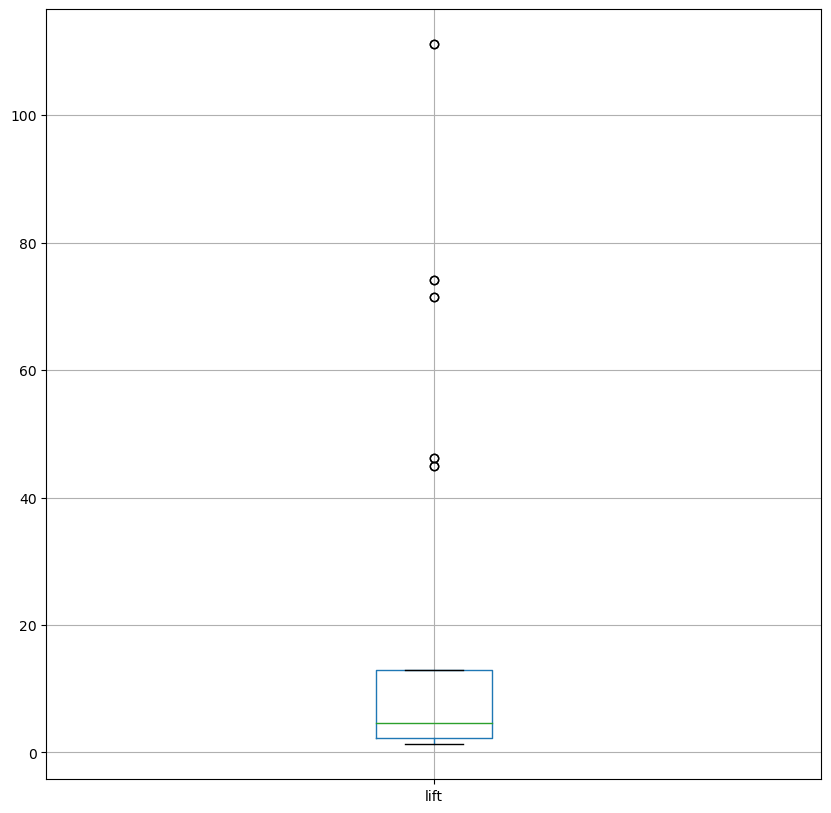

In [90]:
rules_l_judo[['lift']].boxplot()

In [91]:
# Both thresholds
# Option A
rules_c_judo[ (rules_c_judo['lift'] >= 2) &
       (rules_c_judo['confidence'] >= 0.35) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(jiu),(jitsu),0.008,0.009,0.008,1.000000,111.111111,0.007928,inf,0.998992
6,(jitsu),(jiu),0.009,0.008,0.008,0.888889,111.111111,0.007928,8.928000,1.000000
2,(black),(belt),0.008,0.076,0.007,0.875000,11.513158,0.006392,7.392000,0.920507
3,(green),(belt),0.008,0.076,0.007,0.875000,11.513158,0.006392,7.392000,0.920507
9,(mata),(uchi),0.007,0.012,0.006,0.857143,71.428571,0.005916,6.916000,0.992951
15,"(bjj, gi)",(judo),0.007,0.185,0.006,0.857143,4.633205,0.004705,5.705000,0.789695
1,(martial),(art),0.014,0.017,0.011,0.785714,46.218487,0.010762,4.587333,0.992255
12,(youtube),(watch),0.009,0.009,0.006,0.666667,74.074074,0.005919,2.973000,0.995459
13,(watch),(youtube),0.009,0.009,0.006,0.666667,74.074074,0.005919,2.973000,0.995459
0,(art),(martial),0.017,0.014,0.011,0.647059,46.218487,0.010762,2.793667,0.995283


In [92]:
# Option B
rules_l_judo[ (rules_l_judo['lift'] >= 2) &
       (rules_l_judo['confidence'] >= 0.35) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23,(jiu),(jitsu),0.008,0.009,0.008,1.000000,111.111111,0.007928,inf,0.998992
22,(jitsu),(jiu),0.009,0.008,0.008,0.888889,111.111111,0.007928,8.928000,1.000000
35,(watch),(youtube),0.009,0.009,0.006,0.666667,74.074074,0.005919,2.973000,0.995459
34,(youtube),(watch),0.009,0.009,0.006,0.666667,74.074074,0.005919,2.973000,0.995459
30,(uchi),(mata),0.012,0.007,0.006,0.500000,71.428571,0.005916,1.986000,0.997976
31,(mata),(uchi),0.007,0.012,0.006,0.857143,71.428571,0.005916,6.916000,0.992951
1,(martial),(art),0.014,0.017,0.011,0.785714,46.218487,0.010762,4.587333,0.992255
0,(art),(martial),0.017,0.014,0.011,0.647059,46.218487,0.010762,2.793667,0.995283
33,(seoi),(nage),0.012,0.013,0.007,0.583333,44.871795,0.006844,2.368800,0.989589
32,(nage),(seoi),0.013,0.012,0.007,0.538462,44.871795,0.006844,2.140667,0.990592


**Generate for Surfing**

In [93]:
#get all snowboarding keywords
surfing_data = dat[dat["category"]== 'surfing']
surfing_df=surfing_data.iloc[:,9:14]
surfing_list=pd.Series([])
for col in surfing_df:
    surfing_list = surfing_list.append(surfing_df[col].dropna())
surfing_data


C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\380653851.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  surfing_list=pd.Series([])
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\380653851.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  surfing_list = surfing_list.append(surfing_df[col].dropna())
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\380653851.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  surfing_list = surfing_list.append(surfing_df[col].dropna())
C:\Users\jingx\AppData\Local\Temp\ipykernel_33124\380653851.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  surfing_list = s

,text,category,text_clean,text_tokenized,text_no_stopwords,text_lemmatized,text_final,keywords,formatted_keywords,0,1,2,3,4,keywords_list
8,I've been riding shitty Craigslist dumpster di...,surfing,i ve been riding shitty craigslist dumpster di...,"[i, ve, been, riding, shitty, craigslist, dump...","[ve, riding, shitty, craigslist, dumpster, div...","[ve, riding, shitty, craigslist, dumpster, div...",ve riding shitty craigslist dumpster diver han...,"{'shaper': 0.582, 'relationship': 0.216, 'awhi...",shaper relationship awhile cruz arena,shaper,relationship,awhile,cruz,arena,"[shaper, relationship, awhile, cruz, arena]"
21,"I know, another need essentials thread wtf, bu...",surfing,i know another need essentials thread wtf but ...,"[i, know, another, need, essentials, thread, w...","[essentials, thread, wtf, heres, question, ess...","[essential, thread, wtf, here, question, essen...",essential thread wtf here question essential s...,"{'essential': 0.709, 'billabong': 0.354, 'suit...",essential billabong suit seam stack,essential,billabong,suit,seam,stack,"[essential, billabong, suit, seam, stack]"
22,"Hi, I'm looking to get a custom board from [Th...",surfing,hi i m looking to get a custom board from thre...,"[hi, i, m, looking, to, get, a, custom, board,...","[hi, looking, custom, board, thread, designs, ...","[hi, looking, custom, board, thread, design, h...",hi looking custom board thread design http tds...,"{'hybrid': 0.482, 'deciding': 0.342, 'towards'...",hybrid deciding towards ww hypto,hybrid,deciding,towards,ww,hypto,"[hybrid, deciding, towards, ww, hypto]"
26,I own both of these fins and I am still having...,surfing,i own both of these fins and i am still having...,"[i, own, both, of, these, fins, and, i, am, st...","[own, fins, am, trouble, deciding, fins, blacs...","[own, fin, am, trouble, deciding, fin, blacsti...",own fin am trouble deciding fin blacstix expen...,"{'fin': 0.645, 'fastest': 0.218, 'generate': 0...",fin fastest generate deciding dimension,fin,fastest,generate,deciding,dimension,"[fin, fastest, generate, deciding, dimension]"
30,I’ve been getting bored of the usual jetty spo...,surfing,i ve been getting bored of the usual jetty spo...,"[i, ve, been, getting, bored, of, the, usual, ...","[ve, getting, bored, usual, jetty, spots, surf...","[ve, getting, bored, usual, jetty, spot, surf,...",ve getting bored usual jetty spot surf unique ...,"{'unique': 0.53, 'spot': 0.482, 'pier': 0.283,...",unique spot pier bored nj,unique,spot,pier,bored,nj,"[unique, spot, pier, bored, nj]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,Just curious if anyone knows if theres best ti...,surfing,just curious if anyone knows if theres best ti...,"[just, curious, if, anyone, knows, if, theres,...","[curious, theres, times, surf, times, winds, p...","[curious, there, time, surf, time, wind, pick,...",curious there time surf time wind pick beach t...,"{'hiking': 0.368, 'spending': 0.298, 'wind': 0...",hiking spending wind heading whatever,hiking,spending,wind,heading,whatever,"[hiking, spending, wind, heading, whatever]"
4989,"Hey guys, first time posting. I've started and...",surfing,hey guys first time posting i ve started and h...,"[hey, guys, first, time, posting, i, ve, start...","[hey, guys, time, posting, ve, started, surfin...","[hey, guy, time, posting, ve, started, surfing...",hey guy time posting ve started surfing funboa...,"{'length': 0.332, 'seller': 0.228, 'eyeing': 0...",length seller eyeing ventura choosing,length,seller,eyeing,ventura,choosing,"[length, seller, eyeing, ventura, choosing]"
4993,"Dear friends of /r/surfing,<lb><lb>My childhoo...",surfing,dear friends of r surfing my childhood friend ...,"[dear, friends, of, r, surfing, my, childhood,...","[dear, friends, surfing, childhood, friend, pl...","[dear, friend, surfing, childhood, friend, pla...",dear friend surfing childhood friend planning ...,"{'nicaragua': 0.375, 'nica': 0.276, 'surfing':...",nicaragua nica surfing capable

In [94]:
#preprocess the text
surfing_trans = []
for i in range(0, 1000):
    surfing_trans.append([str(surfing_df.values[i, j]) for j in range(0, topn)])

surfing_trans = np.array(surfing_trans)



te_surfing = TransactionEncoder()
surfing_encoded = te_surfing.fit_transform(surfing_trans)
surfing_encoded = pd.DataFrame(surfing_encoded, columns = te_surfing.columns_)

# getting the shape of the data
surfing_encoded.shape

(1000, 2000)

**Generate Frequent itemsets using Apriori algorithm for surfing category**


In [95]:
frequent_keyword_surfing=apriori(surfing_encoded, min_support = 0.006, use_colnames = True)
frequent_keyword_surfing

,support,itemsets
0,0.007,(advice)
1,0.007,(amp)
2,0.007,(baja)
3,0.024,(bali)
4,0.008,(bay)
...,...,...
141,0.006,"(wave, break)"
142,0.006,"(wave, catch)"
143,0.006,"(santa, cruz)"
144,0.008,"(wave, paddle)"


In [96]:
frequent_keyword_surfing[['support']].describe()

,support
count,146.000000
mean,0.011418
std,0.015075
min,0.006000
25%,0.006000
50%,0.008000
75%,0.010000
max,0.117000


In [97]:
rules_c_surfing = association_rules(frequent_keyword_surfing, metric="confidence", min_threshold=0.1)
rules_c_surfing.sort_values('confidence', ascending = False, inplace = True)
rules_c_surfing

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(box),(fin),0.008,0.034,0.007,0.875000,25.735294,0.006728,7.728000,0.968894
10,(cruz),(santa),0.008,0.010,0.006,0.750000,75.000000,0.005920,3.960000,0.994624
11,(paddle),(wave),0.013,0.100,0.008,0.615385,6.153846,0.006700,2.340000,0.848531
8,(catch),(wave),0.010,0.100,0.006,0.600000,6.000000,0.005000,2.250000,0.841751
9,(santa),(cruz),0.010,0.008,0.006,0.600000,75.000000,0.005920,2.480000,0.996633
7,(break),(wave),0.021,0.100,0.006,0.285714,2.857143,0.003900,1.260000,0.663943
5,(fin),(box),0.034,0.008,0.007,0.205882,25.735294,0.006728,1.249185,0.994972
0,(beach),(surfing),0.042,0.065,0.007,0.166667,2.564103,0.004270,1.122000,0.636743
2,(surfing),(board),0.065,0.117,0.009,0.138462,1.183432,0.001395,1.024911,0.165775
3,(wave),(board),0.100,0.117,0.012,0.120000,1.025641,0.000300,1.003409,0.027778


<Axes: >

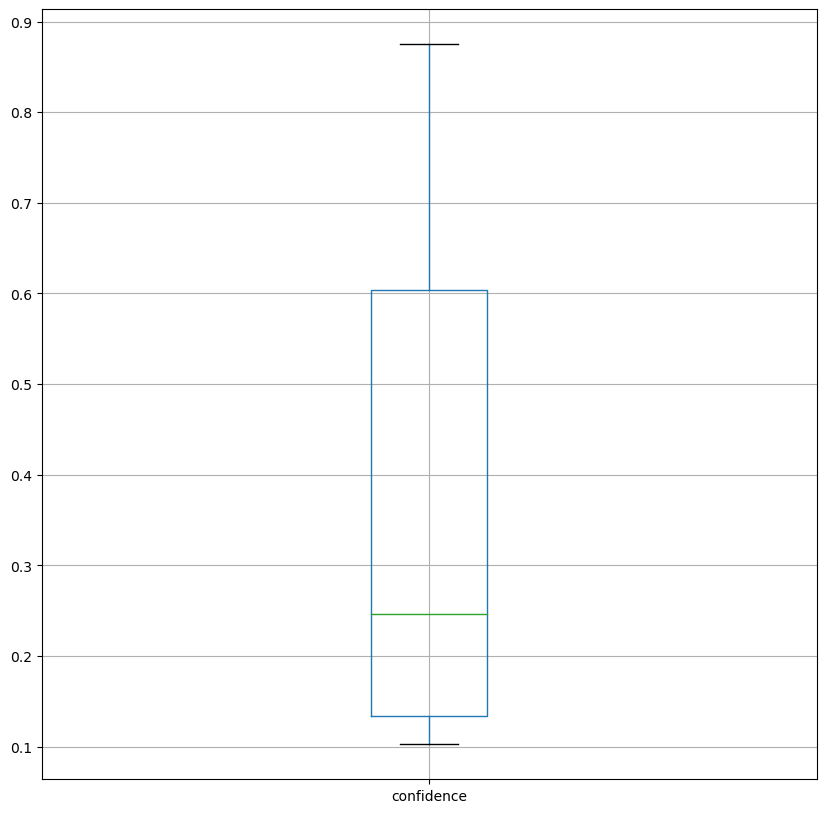

In [98]:
rules_c_surfing[['confidence']].boxplot()

In [99]:
rules_l_surfing = association_rules(frequent_keyword_surfing, metric="lift", min_threshold=1)
rules_l_surfing.sort_values('lift', ascending = False, inplace = True)
rules_l_surfing

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(santa),(cruz),0.010,0.008,0.006,0.600000,75.000000,0.005920,2.480000,0.996633
13,(cruz),(santa),0.008,0.010,0.006,0.750000,75.000000,0.005920,3.960000,0.994624
6,(fin),(box),0.034,0.008,0.007,0.205882,25.735294,0.006728,1.249185,0.994972
7,(box),(fin),0.008,0.034,0.007,0.875000,25.735294,0.006728,7.728000,0.968894
14,(wave),(paddle),0.100,0.013,0.008,0.080000,6.153846,0.006700,1.072826,0.930556
15,(paddle),(wave),0.013,0.100,0.008,0.615385,6.153846,0.006700,2.340000,0.848531
10,(wave),(catch),0.100,0.010,0.006,0.060000,6.000000,0.005000,1.053191,0.925926
11,(catch),(wave),0.010,0.100,0.006,0.600000,6.000000,0.005000,2.250000,0.841751
8,(wave),(break),0.100,0.021,0.006,0.060000,2.857143,0.003900,1.041489,0.722222
9,(break),(wave),0.021,0.100,0.006,0.285714,2.857143,0.003900,1.260000,0.663943


<Axes: >

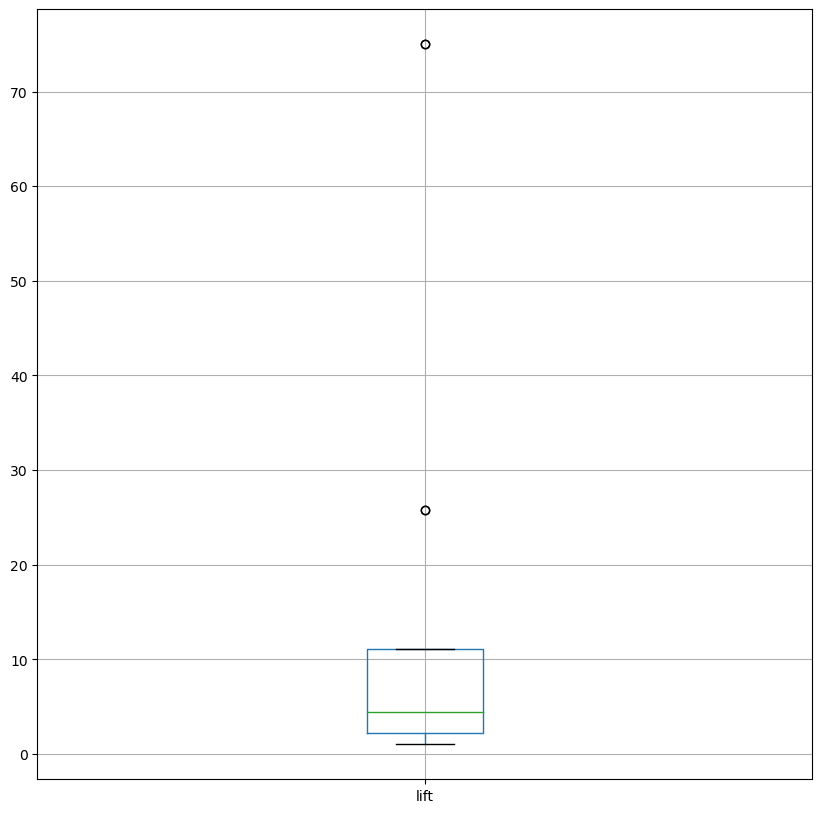

In [100]:
rules_l_surfing[['lift']].boxplot()

In [101]:
# Both thresholds
# Option A
rules_c_surfing[ (rules_c_surfing['lift'] >= 4) &
       (rules_c_surfing['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(box),(fin),0.008,0.034,0.007,0.875000,25.735294,0.006728,7.728,0.968894
10,(cruz),(santa),0.008,0.010,0.006,0.750000,75.000000,0.005920,3.960,0.994624
11,(paddle),(wave),0.013,0.100,0.008,0.615385,6.153846,0.006700,2.340,0.848531
8,(catch),(wave),0.010,0.100,0.006,0.600000,6.000000,0.005000,2.250,0.841751
9,(santa),(cruz),0.010,0.008,0.006,0.600000,75.000000,0.005920,2.480,0.996633


In [102]:
# Option B
rules_l_surfing[ (rules_l_surfing['lift'] >= 4) &
       (rules_l_surfing['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(santa),(cruz),0.010,0.008,0.006,0.600000,75.000000,0.005920,2.480,0.996633
13,(cruz),(santa),0.008,0.010,0.006,0.750000,75.000000,0.005920,3.960,0.994624
7,(box),(fin),0.008,0.034,0.007,0.875000,25.735294,0.006728,7.728,0.968894
15,(paddle),(wave),0.013,0.100,0.008,0.615385,6.153846,0.006700,2.340,0.848531
11,(catch),(wave),0.010,0.100,0.006,0.600000,6.000000,0.005000,2.250,0.841751


# Problem2

## 3. Classification Modeling

### 3.1 Sample the data

In [103]:
X = text_tfidf.toarray()

y = dat['category'].map( {'soccer': 0, 'snowboarding': 1,'triathlon':2,'judo':3,'surfing':4} ).astype(int)

In [160]:
# Creating a base model and finding the best dataset for the model
datasets = ["Phoedora_tfidf.csv", "Phoedora_WordCount.csv", "Jiawei_tfidf.csv", "Jiawei_wordcount.csv", "Jingxiang_TFIDF.csv", "Jingxiang_WordCount.csv", "Jovan_tfidf.csv", "Jovan_Wordcount.csv", "Kaleb_tfidf.csv", "Kaleb_WordCount.csv"]

best_dataset = ""
max_accuracy = 0
all_accuracies = []

for data in datasets:
 X = pd.read_csv(data)
 X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)
 lr = LogisticRegression(solver="lbfgs", max_iter=500)
 training_scores = cross_val_score(lr, X_train, y_train, cv=5)
 training_score = np.mean(training_scores)
 all_accuracies.append(training_score)
 if training_score > max_accuracy:
    max_accuracy = training_score
    best_dataset = data
 print("Dataset: " + data)
 print("Accuracy (Cross-Validation): {:.3f}%".format(training_score*100))



Dataset: Phoedora_tfidf.csv
Accuracy (Cross-Validation): 97.200%
Dataset: Phoedora_WordCount.csv
Accuracy (Cross-Validation): 96.550%
Dataset: Jiawei_tfidf.csv
Accuracy (Cross-Validation): 97.175%
Dataset: Jiawei_wordcount.csv
Accuracy (Cross-Validation): 96.500%
Dataset: Jingxiang_TFIDF.csv
Accuracy (Cross-Validation): 97.025%
Dataset: Jingxiang_WordCount.csv
Accuracy (Cross-Validation): 96.425%
Dataset: Jovan_tfidf.csv
Accuracy (Cross-Validation): 97.225%
Dataset: Jovan_Wordcount.csv
Accuracy (Cross-Validation): 96.300%
Dataset: Kaleb_tfidf.csv
Accuracy (Cross-Validation): 96.825%
Dataset: Kaleb_WordCount.csv
Accuracy (Cross-Validation): 96.375%


In [104]:
from sklearn.model_selection import train_test_split 
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
# Set the random state as 2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [105]:
from sklearn.model_selection import train_test_split


scores = cross_val_score(LogisticRegression(solver = 'lbfgs', max_iter =1000), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.97


In [106]:

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(solver = 'lbfgs', max_iter =1000), param_grid, cv=5) 
grid.fit(X_train, y_train) 
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) 
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.97
Best parameters:  {'C': 1}


In [107]:
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.97


### 3.2 Build the Model(s)

In [108]:
X2= text_counts.toarray()
y = dat['category'].map( {'soccer': 0, 'snowboarding': 1,'triathlon':2,'judo':3,'surfing':4} ).astype(int)

In [109]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%) 
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=2)

In [110]:
scores = cross_val_score(LogisticRegression(solver = 'lbfgs', max_iter =1000), X2_train, y_train, cv=5) 
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.96


In [111]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]} 
grid = GridSearchCV(LogisticRegression(solver = 'lbfgs', max_iter =1000), param_grid, cv=5) 
grid.fit(X2_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) 
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.96
Best parameters:  {'C': 0.1}


In [112]:
print("Test score: {:.2f}".format(grid.score(X2_test, y_test)))

Test score: 0.97


In [113]:
### 3.2 Build the Model(s)

X2= text_counts.toarray()

y = dat['category'].map( {'soccer': 0 ,'snowboarding': 1,'triathlon':2,'judo':3,'surfing':4}).astype(int)

# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%) 
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=2)

scores = cross_val_score(LogisticRegression(solver = 'lbfgs', max_iter =1000), X2_train, y_train, cv=5) 
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))


Mean cross-validation accuracy: 0.96


In [118]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]} 
grid = GridSearchCV(LogisticRegression(solver = 'lbfgs', max_iter =1000), param_grid, cv=5) 
grid.fit(X2_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) 
print("Best parameters: ", grid.best_params_)

print("Test score: {:.2f}".format(grid.score(X2_test, y_test)))

Best cross-validation score: 0.96
Best parameters:  {'C': 0.1}
Test score: 0.97


### 3.3 Evaluate and Improve the Model(s)

In [119]:
#create classifier
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10],
              "n_estimators":[3,5,10,25,50,150]}
model = RandomForestClassifier(random_state=2)
gs = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=4)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .......max_depth=3, n_estimators=3;, score=0.489 total time=   0.4s
[CV 2/5] END .......max_depth=3, n_estimators=3;, score=0.446 total time=   0.1s
[CV 3/5] END .......max_depth=3, n_estimators=3;, score=0.361 total time=   0.1s
[CV 4/5] END .......max_depth=3, n_estimators=3;, score=0.430 total time=   0.0s
[CV 5/5] END .......max_depth=3, n_estimators=3;, score=0.413 total time=   0.0s
[CV 1/5] END .......max_depth=3, n_estimators=5;, score=0.617 total time=   0.0s
[CV 2/5] END .......max_depth=3, n_estimators=5;, score=0.530 total time=   0.0s
[CV 3/5] END .......max_depth=3, n_estimators=5;, score=0.451 total time=   0.0s
[CV 4/5] END .......max_depth=3, n_estimators=5;, score=0.527 total time=   0.0s
[CV 5/5] END .......max_depth=3, n_estimators=5;, score=0.506 total time=   0.0s
[CV 1/5] END ......max_depth=3, n_estimators=10;, score=0.747 total time=   0.0s
[CV 2/5] END ......max_depth=3, n_estimators=10

[CV 2/5] END .....max_depth=10, n_estimators=10;, score=0.879 total time=   0.2s
[CV 3/5] END .....max_depth=10, n_estimators=10;, score=0.861 total time=   0.2s
[CV 4/5] END .....max_depth=10, n_estimators=10;, score=0.836 total time=   0.2s
[CV 5/5] END .....max_depth=10, n_estimators=10;, score=0.867 total time=   0.2s
[CV 1/5] END .....max_depth=10, n_estimators=25;, score=0.934 total time=   0.4s
[CV 2/5] END .....max_depth=10, n_estimators=25;, score=0.923 total time=   0.4s
[CV 3/5] END .....max_depth=10, n_estimators=25;, score=0.917 total time=   0.4s
[CV 4/5] END .....max_depth=10, n_estimators=25;, score=0.913 total time=   0.4s
[CV 5/5] END .....max_depth=10, n_estimators=25;, score=0.904 total time=   0.4s
[CV 1/5] END .....max_depth=10, n_estimators=50;, score=0.943 total time=   0.8s
[CV 2/5] END .....max_depth=10, n_estimators=50;, score=0.926 total time=   0.8s
[CV 3/5] END .....max_depth=10, n_estimators=50;, score=0.936 total time=   0.8s
[CV 4/5] END .....max_depth=

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [3, 5, 10, 25, 50, 150]},
             scoring='accuracy', verbose=4)

In [120]:
print(gs.best_score_)
print(gs.best_params_)

0.9414285714285715
{'max_depth': 10, 'n_estimators': 150}


In [127]:
#creating classifier
model=RandomForestClassifier(max_depth=8,n_estimators=100,random_state=2)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=2)

In [128]:
print('train_acc: ', model.score(X_train, y_train)) 
print('test_acc: ', model.score(X_test, y_test))

train_acc:  0.9571428571428572
test_acc:  0.9486666666666667


**Confusion matrix**

In [129]:

y_pred = model.predict(X_test) 
print(accuracy_score(y_test,y_pred))
print("\n") 
print(confusion_matrix(y_test, y_pred, labels =[0, 1])) 
print("\n") 
print(classification_report(y_test, y_pred))

0.9486666666666667


[[301   8]
 [  3 296]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       312
           1       0.87      0.95      0.91       310
           2       0.97      0.95      0.96       303
           3       0.99      0.96      0.97       277
           4       0.94      0.92      0.93       298

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500

